# Bank Customer Churn Prediction Machine Learning Model

## Problem statement:

Bank is facing a critical issue where a significant number of customers have been discontinuing their relationships by either closing their accounts or migrating to rival banks. This trend has inflicted substantial damage on the bank's quarterly earnings and poses a substantial threat to its annual revenues for the current fiscal year. This, in turn, has caused a notable decline in stock value and market capitalization by X%. To address this issue, a multidisciplinary team comprising professionals from business, product development, engineering, and data science has been assembled.

- **Objective**: The primary objective is to construct a predictive model that can reasonably forecast which customers are likely to discontinue their relationship with the bank in the near future. Additionally, achieving the capability to accurately estimate the timing of their potential churn would be an advantageous outcome.

- **Definition of Churn**: Churn is defined as a situation in which a customer closes all of their active accounts with the bank. Depending on the specific business requirements, churn can also be defined differently, such as a customer not engaging in any transactions for a period of either 6 months / 1 year.

## From a perspective of the Business team or Product Manager:

(1) **Business Objective**: The primary aim is to halt the decline in revenue and prevent the loss of active bank customers.

(2) **Identifying Data Sources**: We need to gather data from various sources, including transactional systems, event-based logs, data warehouses (such as MySQL databases and Redshift on AWS), data lakes, and NoSQL databases.

(3) **Data Quality Assessment**: It's crucial to ensure the quality of our data. This involves eliminating duplicate events or transactions, addressing instances where data is missing for certain time periods, and protecting personal identifiable information (PII) data.

(4) **Establishing Business and Data Metrics**: We should define and monitor key metrics over time, potentially using intuitive visualizations.

    (i) Business Metrics: These include tracking the churn rate on a monthly, weekly, or quarterly basis, monitoring the trend in the average number of products per customer, assessing the percentage of dormant customers, and other relevant descriptive metrics.

    (ii) Data-Related Metrics: We'll evaluate the performance of our predictive model using metrics like F1-score, Recall, and Precision, where Recall measures true positives (TP) divided by the sum of TP and false negatives (FN), Precision calculates TP divided by the sum of TP and false positives (FP), and the F1-score is the harmonic mean of Recall and Precision.

(5) **Format of Prediction Model Output**: Since this won't be an online model, there's no need for deployment. Instead, we'll conduct periodic model runs, possibly on a monthly or quarterly basis. The output will consist of a list of customers and their likelihood to churn, which will be shared with the business teams (Sales/Marketing) or Product team.

(6) **Action Based on Model Insights**: Upon receiving the output from the Data Science team, various business interventions can be implemented to prevent customer churn. These may include tailored bank offers for customers, proactively addressing customer grievances, and utilizing basic Exploratory Data Analysis (EDA) to identify different customer groups and determine appropriate interventions for each group.

How should we establish the desired performance targets for our metrics?
In terms of data science-related metrics:

- Recall: A target of over 70% is sought.
- Precision: We aim for a precision rate exceeding 70%.
- F1-score: The goal is to achieve an F1-score surpassing 70%.

Concerning business metrics, the typical approach is top-down. However, it is considered a best practice to ensure that these metrics have at least half the impact of the data science metrics. For instance, if our Recall target is set at 70%, meaning accurately identifying 70% of customers likely to churn in the near future, we anticipate that through business interventions like offers and customer outreach, we can potentially retain 50% of these at-risk customers, resulting in a minimum 35% enhancement in the Churn Rate.

# Notebook-Style Solution Program

### 1. Installing Packages of Specific Versions

This code is a series of commands using the pip3 package manager to install specific versions of Python packages such as IPython, Joblib, LightGBM, Matplotlib, NumPy, Pandas, Scikit-Learn, Seaborn, SHAP, and XGBoost. Each comment above the !pip3 install command explains which package is being installed and specifies the version to be installed.

In [10]:
# Install the specific version of the IPython package
!pip3 install ipython;

# Install the specific version of the Joblib package
!pip3 install joblib;

# Install the specific version of the LightGBM package
!pip3 install lightgbm;

# Install the specific version of the Matplotlib package
!pip3 install matplotlib;

# Install the specific version of the NumPy package
!pip3 install numpy;

# Install the specific version of the Pandas package
!pip3 install pandas;

# Install the specific version of the Scikit-Learn package
!pip3 install scikit_learn;

# Install the specific version of the Seaborn package
!pip3 install seaborn;

# Install the specific version of the SHAP package
!pip3 install shap;

# Install the specific version of the XGBoost package
!pip3 install xgboost;

### 2. Importing Packages

This code is importing several Python libraries, including Pandas, NumPy, Matplotlib, and Seaborn. It assigns aliases to these libraries to make it easier to reference their functions and objects throughout the code.

In [11]:
# Import the Pandas library and use 'pd' as an alias for it
import pandas as pd

# Import the NumPy library and use 'np' as an alias for it
import numpy as np

# Import the Matplotlib library and use 'plt' as an alias for it
import matplotlib.pyplot as plt

# Import the Seaborn library and use 'sns' as an alias for it
import seaborn as sns

### Configuring Packages

#### Enables inline plotting for Matplotlib, allowing graphs to be displayed within the notebook

In [12]:
# Enable inline plotting for Matplotlib to display graphs within the notebook
%matplotlib inline

#### Sets up the ability to display multiple outputs in a single cell

In [13]:
# Allow multiple outputs to be displayed in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Suppresses all warnings to prevent them from appearing in the output

In [14]:
# Suppress all warnings to prevent them from cluttering the output
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)  # Ignore DeprecationWarnings

#### Configures Pandas to display all rows and columns of dataframes, ensuring that none of the data gets truncated

In [15]:
# Configure Pandas to display all rows and columns of dataframes, avoiding truncation
from IPython.display import display
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

### 4. Importing the Dataset

In [16]:
# Load a CSV file into a Pandas DataFrame from the specified path
df = pd.read_csv("/content/Churn_Modelling.csv")

In [17]:
# Display the shape of the DataFrame (number of rows and columns)
df.shape

(10000, 14)

In [18]:
# Display the first 10 rows of the DataFrame to preview the data
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### 5. Perform Basic Exploratory Data Analysis

In [19]:
# Describe statistical summary for all numerical columns in the DataFrame
numerical_summary = df.select_dtypes(exclude=["object"]).describe()
numerical_summary

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [20]:
# Describe statistical summary for all non-numerical/categorical columns in the DataFrame
categorical_summary = df.select_dtypes(include=["object"]).describe()
categorical_summary

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [21]:
# Checking the count of unique customers in the dataset
total_customers = df.shape[0]  # Get the total number of rows in the DataFrame
unique_customers = df.CustomerId.nunique()  # Get the count of unique CustomerId values
print(total_customers, unique_customers)

10000 10000


In [22]:
# Grouping the DataFrame by 'Surname' and calculating the count and mean of 'RowNumber' and 'Exited'
grouped_df = df.groupby(['Surname']).agg({'RowNumber': 'count', 'Exited': 'mean'}).reset_index()

# Sorting the grouped DataFrame by 'RowNumber' in descending order
sorted_df = grouped_df.sort_values(by='RowNumber', ascending=False)

# Displaying the first few rows of the sorted DataFrame
sorted_df.head()

,Surname,RowNumber,Exited
2473,Smith,32,0.281250
1689,Martin,29,0.310345
2389,Scott,29,0.103448
2751,Walker,28,0.142857
336,Brown,26,0.192308


In [23]:
# Calculating the normalized value counts of 'Geography' in the DataFrame
geography_counts = df.Geography.value_counts(normalize=True)
geography_counts

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

Key Observations:
- We will exclude the row numbers and the CustomerID column, as it does not provide any additional information and each row represents a distinct customer.
- Consequently, we can categorize the columns/features into non-essential, numerical, categorical, and target variables.
- Typically, CustomerID can be a valuable feature for deriving user-specific characteristics, but the dataset at hand lacks the necessary information to calculate additional customer attributes.

Categorising columns from the DataFrame into different categories, as defined:
- target_variable contains the target variable (in this case, 'Exited').
- columns_to_remove lists non-essential columns that will be removed from the DataFrame.
- numerical_features contains the names of numerical features.
- categorical_features contains the names of categorical features.

In [24]:
# Categorizing columns into different categories as specified
target_variable = ['Exited']  # Target variable category
columns_to_remove = ['RowNumber', 'CustomerId']  # Non-essential columns to be removed
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']  # Numerical features
categorical_features = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']  # Categorical features

Firstly, we separates the target variable values ('Exited') from the DataFrame and assigns them to the variable target_values. Secondly, we removes the specified non-essential columns listed in columns_to_remove from the DataFrame to prepare it for further analysis.

In [25]:
# Separating the target variable and removing non-essential columns from the DataFrame
target_values = df[target_variable].values  # Extracting the target variable values
df.drop(columns_to_remove, axis=1, inplace=True)  # Removing the specified non-essential columns from the DataFrame

Questioning the Data:
- **Lack of date/time columns**: Missing valuable information for time-based analysis.
- **Snapshot timing**: Uncertainty about when the data was collected, impacting features like Balance, Tenure, NumOfProducts, and EstimatedSalary.
- **Single or multiple dates**: Determining if all values/features are related to a single date or spread over multiple dates.
- **Update frequency**: The frequency at which customer features get refreshed.
- **Snapshot vs. time-series data**: Assessing if it's feasible to have values over time instead of just a single snapshot.
- **Exiting customers with balance or products**: Understanding if exiting customers retained certain products or churned entirely.
- **Activity level estimation**: Considering metrics like the number and type of transactions to gauge customer activity beyond a binary IsActiveMember.
- **Transaction patterns**: Analyzing customer transaction patterns to detect actual churn; e.g., daily/weekly transactions vs. annual transactions.

Overall objective is to gain a deeper understanding of the data, refine the problem statement, and align with the stated goal. Additional data or context could enhance model performance.

### 6. Separation into (Training, Testing and Validation) Sets

As this represents the sole dataset at our disposal, we reserve a separate test set for final model evaluation, enabling us to gauge how well our selected model performs on previously unseen or new data.

Additionally, we establish a validation set, which will serve as the basis for our initial models, allowing us to assess and refine them.

In [26]:
# Importing the necessary function for splitting the dataset
from sklearn.model_selection import train_test_split

# Creating a holdout/test set for final model evaluation (10% of the data)
df_train_val, df_test, y_train_val, y_test = train_test_split(df, target_values.ravel(), test_size=0.1, random_state=42)

# Further splitting the data into a training set and a validation set (12% of the remaining data)
df_train, df_val, y_train, y_val = train_test_split(df_train_val, y_train_val, test_size=0.12, random_state=42)

# Displaying the shapes of the resulting datasets and the means of the target variables
df_train.shape, df_val.shape, df_test.shape, y_train.shape, y_val.shape, y_test.shape
np.mean(y_train), np.mean(y_val), np.mean(y_test)

((7920, 12), (1080, 12), (1000, 12), (7920,), (1080,), (1000,))

(0.20303030303030303, 0.22037037037037038, 0.191)

Breakdown of the above code:
1. It imports the train_test_split function from scikit-learn to facilitate dataset splitting.
2. It divides the dataset into three subsets:
    - df_train_val and y_train_val represent the combined training and validation data (90% of the original data).
    - df_test and y_test represent the holdout or test set (10% of the original data).
    - It then further splits the df_train_val dataset into training (df_train and y_train) and validation (df_val and y_val) sets, with the validation set being 12% of the remaining data.
3. It displays the shapes of the resulting datasets, providing information about the number of rows and columns in each dataset.
4. Lastly, it calculates and displays the means of the target variables (y_train, y_val, and y_test) to offer insights into the distribution of target values across these subsets.

### 7. Graph Univariate plots of Numerical Variables in Training Set

<Axes: ylabel='CreditScore'>

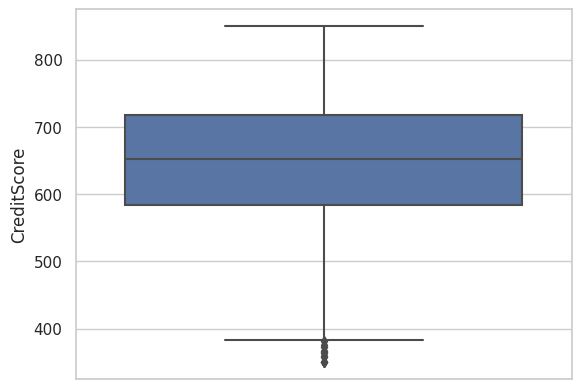

In [27]:
# Visualizing CreditScore using a boxplot
sns.set(style="whitegrid")
sns.boxplot(y=df_train['CreditScore'])

<Axes: ylabel='Age'>

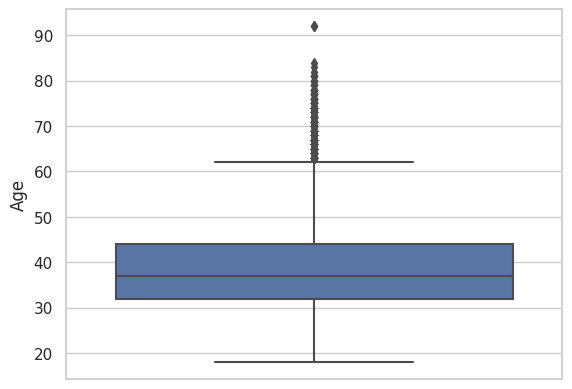

In [28]:
# Visualizing Age using a boxplot
sns.boxplot(y=df_train['Age'])

<Axes: ylabel='Tenure'>

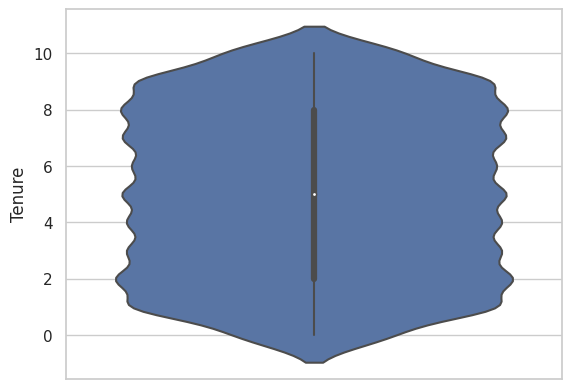

In [29]:
# Visualizing Tenure using a violin plot
sns.violinplot(y=df_train.Tenure)

<Axes: ylabel='Balance'>

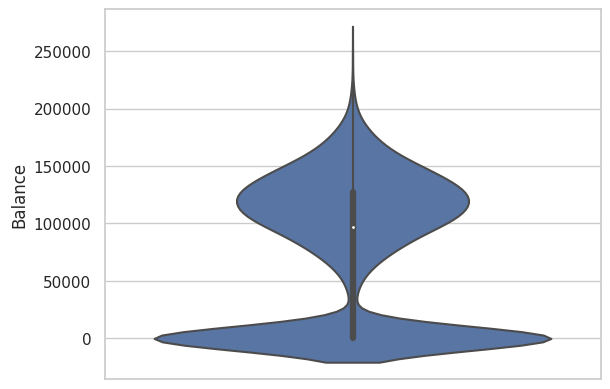

In [30]:
# Visualizing Balance using a violin plot
sns.violinplot(y=df_train['Balance'])

<Axes: xlabel='NumOfProducts'>

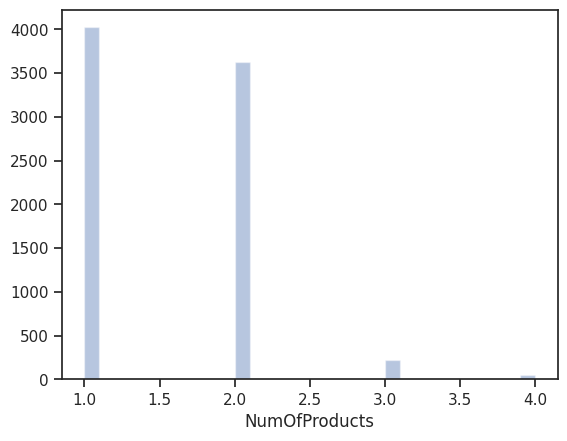

In [31]:
# Visualizing NumOfProducts using a distribution plot
sns.set(style='ticks')
sns.distplot(df_train.NumOfProducts, hist=True, kde=False)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

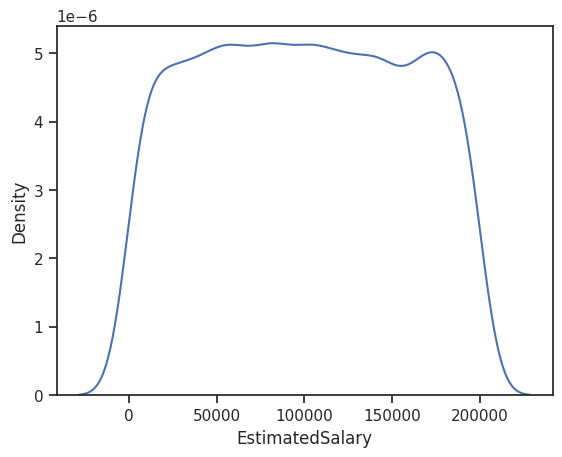

In [32]:
# Visualizing EstimatedSalary using a kernel density plot
sns.kdeplot(df_train.EstimatedSalary)

Key Observations:
- Univariate analysis suggests that the feature 'EstimatedSalary' appears to have a uniform distribution, indicating it may not be a significant predictor.
- Likewise, 'NumOfProducts' mostly contains just two values (1 and 2), reducing its potential as a strong predictor.
- In contrast, 'Balance' exhibits a multi-modal distribution, which we'll explore further to determine if it can effectively differentiate between the two target classes.

### 8. Handling Missing Data and Outliers

#### Addressing Outliers

- Outliers become apparent through the examination of univariate plots for various features.

- These outliers can fall into two categories: those that are logically implausible based on the feature's definition and those that simply represent extreme values within the feature's distribution.

- When dealing with outliers, one approach involves removing the specific data point associated with the outlier from the training set. This is acceptable if these outliers do not constitute a substantial portion of the dataset (typically less than 0.5-1%).

- In scenarios where an outlier's value is logically incorrect, such as encountering a negative Age or a CreditScore exceeding 900, we can replace that particular record's value with either the mean value of the feature or the nearest valid value within the feature's logical range.

Outliers within numerical features can manifest as exceptionally high or low values, falling within the top 1% or bottom 1% of the distribution, or values that defy the feature's defined boundaries.

Outliers within categorical features often manifest as categories with very low frequencies or a minimal number of samples compared to other categorical levels.

Note:
- It's important to note that addressing outliers is not always necessary. This is because not all machine learning algorithms are influenced by the presence of outliers.
    - For instance, ( linear regression and logistic regression ) are susceptible to outliers
    - In contrast, ( tree-based algorithms, k-nearest neighbors (kNN), clustering algorithms, and similar methods ) are typically resilient to impact of outliers.
- Furthermore, outliers can have an impact on metrics like the mean and standard deviation.

Key Observations:
- No outliers observed in any feature of this dataset

#### Addressing Missing Values

In [33]:
# Checking for missing values in the training dataset
df_train.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values detected, as indicated by the sum of null values for each column of the dataset. This absence of missing values can also be confirmed by executing the `df.describe()` command. However, it's important to note that in most real-world datasets, missing values are a common occurrence. In such cases, there are a couple of strategies that can be employed:

1. If a column or feature contains a significant number of missing values, it may be advisable to consider dropping it from the dataset, as it might not contribute substantially to the overall data analysis.

2. In situations where only a few missing values exist within a column or feature, one can choose to impute these missing values. Imputation methods often involve using summary statistics such as the mean, median, or mode of the available data, or filling in missing values with specific numbers like 0 or -1, depending on the nature of the data and the context. For instance, this approach could be applicable when dealing with a feature like "BalanceInAccount."

For learning purposes, I will introduce (missing values) and (outliers) into the a Copied DataFrame

In [34]:
# Create a temporary copy of the training DataFrame for making data modifications
df_missing = df_train.copy()

# Introduce missing values and outliers into the copied DataFrame

# Introduce 10% missing values in the 'Age' column
missing_age_idx = df_missing.sample(frac=0.1).index
df_missing.loc[missing_age_idx, 'Age'] = np.NaN

# Introduce 30% missing values in the 'Geography' column
missing_geography_idx = df_missing.sample(frac=0.3).index
df_missing.loc[missing_geography_idx, 'Geography'] = np.NaN

# Introduce 5% missing values in the 'HasCrCard' column
missing_hascrcard_idx = df_missing.sample(frac=0.05).index
df_missing.loc[missing_hascrcard_idx, 'HasCrCard'] = np.NaN

In [35]:
# Calculate the percentage of missing values in each column
missing_percentage = df_missing.isnull().sum() / df_missing.shape[0]
missing_percentage

Surname            0.00
CreditScore        0.00
Geography          0.30
Gender             0.00
Age                0.10
Tenure             0.00
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.05
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64

Handling (missing values) and (outliers) of 'Age' Variable

In [36]:
# Calculate the mean of the 'Age' column
age_mean = df_missing.Age.mean()

# Replace missing values in the 'Age' column with random values drawn from a normal distribution
df_missing['Age'] = df_missing.Age.apply(lambda x: int(np.random.normal(age_mean, 3)) if np.isnan(x) else x)

<Axes: xlabel='Age', ylabel='Density'>

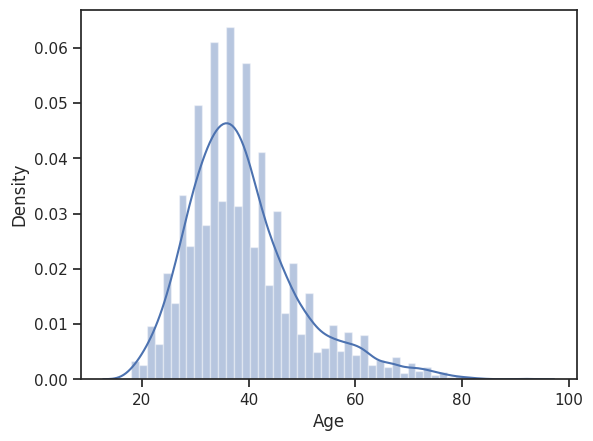

In [37]:
# Plot the distribution of the 'Age' feature before data imputation
sns.distplot(df_train.Age)

<Axes: xlabel='Age', ylabel='Density'>

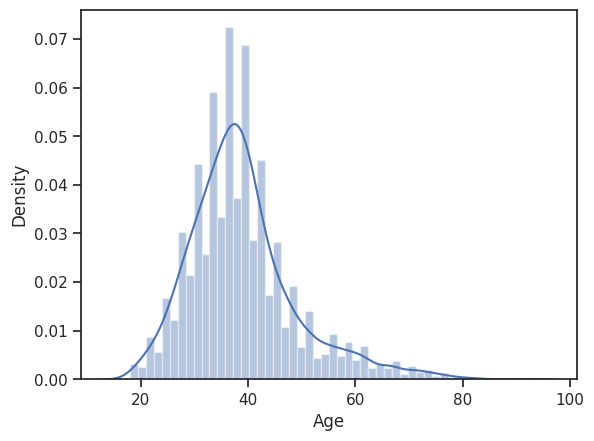

In [38]:
# Plot the distribution of the 'Age' feature after data imputation
sns.distplot(df_missing.Age)

Handling (missing values) and (outliers) of 'Geography' Variable

In [39]:
# Fill missing values in the 'Geography' column (categorical feature with high missing percentage) with 'UNK'
geog_fill_value = 'UNK'
df_missing.Geography.fillna(geog_fill_value, inplace=True)

# Calculate the normalized value counts for the 'Geography' column
geography_value_counts = df_missing.Geography.value_counts(normalize=True)

Handling (missing values) and (outliers) of 'HasCrCard' Variable

In [40]:
# Fill missing values in the 'HasCrCard' column (boolean feature) with 0 for a few missing values, -1 for many missing values
df_missing.HasCrCard.fillna(0, inplace=True)

View (Missing Values) Statistic after Imputation

In [41]:
# Calculate the percentage of missing values in each column after data imputation
missing_percentage_after_imputation = df_missing.isnull().sum() / df_missing.shape[0]
missing_percentage_after_imputation

Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

### 9. Categorical variable encoding

When it comes to encoding categorical variables, a general guideline is as follows:

1. **Label Encoding**: This method is suitable for binary categorical variables and ordinal variables.

2. **One-Hot Encoding**: You should opt for one-hot encoding when dealing with non-ordinal categorical variables that have a relatively low to moderate number of categories, typically fewer than 5-10 levels.

3. **Target Encoding**: Target encoding is a suitable choice for categorical variables that have more than 10 levels.

In terms of applying the rules to our dataset, we know that:
* For HasCrCard and IsActiveMember are already label encoded
* For Gender, a simple Label encoding should be fine.
* For Geography, since there are 3 levels, OneHotEncoding should do the trick
* For Surname, we'll try Target/Frequency Encoding

#### Label Encoding for binary variables

Utilising the Non-Sklearn Method

In [42]:
# Step 1: Create a new column 'Gender_cat' to store the label-encoded values of the 'Gender' column
df_train['Gender_cat'] = df_train['Gender'].astype('category').cat.codes

In [43]:
# Step 2: Display a random sample of 10 rows from the DataFrame
sample_of_10_rows = df_train.sample(10)
sample_of_10_rows

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_cat
1884,Ozuluonye,656,France,Male,35,6,0.00,2,1,0,1485.27,0,1
2794,Wilson,646,France,Male,52,8,59669.43,1,0,0,172495.81,1,1
3910,Baker,620,France,Female,70,3,87926.24,2,1,0,33350.26,1,0
3879,Rickard,778,France,Female,33,9,151772.63,2,0,0,180249.94,1,0
6578,Loginov,850,France,Female,28,9,0.00,2,1,0,185821.41,0,0
3549,Napolitano,675,France,Female,61,5,62055.17,3,1,0,166305.16,1,0
8171,Rowley,496,Spain,Female,44,0,179356.28,2,1,0,2919.21,1,0
3865,McKenzie,623,France,Male,40,6,0.00,2,1,1,66119.07,0,1
9732,Young,724,Spain,Male,39,3,0.00,2,0,1,95562.81,0,1
6357,Pagnotto,491,France,Female,68,3,107571.61,1,0,1,113695.99,0,0


In [44]:
# Step 3: Drop the 'Gender_cat' column, which contains label-encoded values, from the DataFrame
df_train.drop('Gender_cat', axis=1, inplace=True)

Utilising the Sklearn Method

Note: We fit only on train dataset as that's the only data we'll assume we have. We'll treat validation and test sets as unseen data. Hence, they can't be used for fitting the encoders.

Code below uses Scikit-Learn's LabelEncoder to encode categorical values in the 'Gender' column of a dataset and provides comments to explain the process and any potential issues with unseen categories in validation and test sets. It also handles missing values by filling them with -1. Finally, it displays the unique encoded values in each dataset for verification.

In [45]:
# Import the LabelEncoder class from Scikit-Learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
label_encoder = LabelEncoder()

In [46]:
# Label encode the 'Gender' variable in the training dataset
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])

# Create a dictionary mapping original category names to their encoded values
label_encoding_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping for reference
label_encoding_mapping

{'Female': 0, 'Male': 1}

In [47]:
# Note: If the 'Gender' column in the validation or test set contains new values that were not seen during training,
# the label encoder will raise an error. To handle this situation, we'll encode the 'Gender' feature for the validation and test sets as follows:

# Encode the 'Gender' feature for the validation set using the previously created mapping
df_val['Gender'] = df_val['Gender'].map(label_encoding_mapping)

# Encode the 'Gender' feature for the test set using the same mapping
df_test['Gender'] = df_test['Gender'].map(label_encoding_mapping)

In [48]:
# To handle missing or NaN values that might occur due to new categorical levels in the validation and test sets,
# we'll fill those missing values with -1.

# Fill missing/NaN values in the 'Gender' column of the validation set with -1
df_val['Gender'].fillna(-1, inplace=True)

# Fill missing/NaN values in the 'Gender' column of the test set with -1
df_test['Gender'].fillna(-1, inplace=True)

In [49]:
# Check the unique values in the 'Gender' column for each dataset
unique_values_train = df_train['Gender'].unique()
unique_values_val = df_val['Gender'].unique()
unique_values_test = df_test['Gender'].unique()

# Print the unique values to examine them
unique_values_train, unique_values_val, unique_values_test

(array([1, 0]), array([1, 0]), array([1, 0]))

#### One-Hot Encoding Categorical Variables with Multiple Levels

Utilising the Non-Sklearn Method

In [50]:
# Apply one-hot encoding to the 'Geography' column in the 'df_train' DataFrame
# Separate the encoded values using underscores in column names
encoded_df = pd.get_dummies(df_train, prefix_sep="_", columns=['Geography'])

# Display the first few rows of the encoded DataFrame
encoded_df.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4562,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0,1,0
6498,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1,0,0
6072,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1,0,0
5813,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1,0,0
7407,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1,0,0


In [51]:
# Drop the 'Geography_France' dummy column as it's redundant (only one-hot encode is necessary)
encoded_df.drop(['Geography_France'], axis=1, inplace=True)

# Display the first few rows of the DataFrame after dropping the redundant column
encoded_df.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
4562,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,1,0
6498,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,0,0
6072,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,0,0
5813,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,0,0
7407,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,0,0


Utilising the Sklearn Method

Code below prepares and encodes categorical data, ensuring that it can be used in machine learning models that require numeric input. It also handles unknown or missing values by encoding them with a placeholder value (9999) and demonstrates how OneHotEncoder handles such cases.

In [52]:
# Import necessary libraries for one-hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize a LabelEncoder to convert categorical values to numeric labels
label_encoder = LabelEncoder()

In [53]:
# Initialize a OneHotEncoder to perform one-hot encoding, ignoring unknown values and creating dense arrays
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Encode the 'Geography' feature in the training dataset, reshaping it to match the dataset's shape
encoded_train = label_encoder.fit_transform(df_train['Geography']).reshape(df_train.shape[0], 1)

In [54]:
# Check the shape and unique values in the encoded training data
encoded_train.shape
np.unique(encoded_train)

(7920, 1)

array([0, 1, 2])

In [55]:
# Perform one-hot encoding on the encoded training data
one_hot_encoded_train = one_hot_encoder.fit_transform(encoded_train)

# Create a dictionary mapping original category names to their encoded labels
label_encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the mapping
label_encoder_name_mapping

{'France': 0, 'Germany': 1, 'Spain': 2}

In [56]:
# Encode the 'Geography' feature in the validation and test datasets using the previously created mapping
encoded_val = df_val['Geography'].map(label_encoder_name_mapping).ravel().reshape(-1, 1)
encoded_test = df_test['Geography'].map(label_encoder_name_mapping).ravel().reshape(-1, 1)

# Fill missing/NaN values created due to new categorical levels with a placeholder value (9999)
encoded_val[np.isnan(encoded_val)] = 9999
encoded_test[np.isnan(encoded_test)] = 9999

In [57]:
# Check unique values in the encoded validation and test datasets
np.unique(encoded_val)
np.unique(encoded_test)

array([0, 1, 2])

array([0, 1, 2])

In [58]:
# Perform one-hot encoding on the encoded validation and test datasets
one_hot_encoded_val = one_hot_encoder.transform(encoded_val)
one_hot_encoded_test = one_hot_encoder.transform(encoded_test)

In [59]:

# Show what happens when a new value (9999) is inputted into the OneHotEncoder
one_hot_encoder.transform(np.array([[9999]]))

array([[0., 0., 0.]])

#### Adding One-Hot Encoded Columns to Dataframe and Removing the Original Features

In [60]:
# Create a list of column names for the new one-hot encoded features based on the mapping
new_columns = ['country_' + str(x) for x in label_encoder_name_mapping.keys()]

# Print the list of new column names
print(new_columns)

['country_France', 'country_Germany', 'country_Spain']


In [61]:
## Add one-hot encoded columns to the respective dataframes and remove the 'index' column
# For the training dataset
df_train = pd.concat([df_train.reset_index(), pd.DataFrame(one_hot_encoded_train, columns=new_columns)], axis=1).drop(['index'], axis=1)

# For the validation dataset
df_val = pd.concat([df_val.reset_index(), pd.DataFrame(one_hot_encoded_val, columns=new_columns)], axis=1).drop(['index'], axis=1)

# For the test dataset
df_test = pd.concat([df_test.reset_index(), pd.DataFrame(one_hot_encoded_test, columns=new_columns)], axis=1).drop(['index'], axis=1)

In [62]:
# Display the first few rows of each dataset
print("Training set")
df_train.head()
print("\n\nValidation set")
df_val.head()
print("\n\nTest set")
df_test.head()

Training set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Yermakova,678,Germany,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0
1,Warlow-Davies,613,France,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0
2,Fu,628,France,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0
3,Shih,513,France,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0
4,Mahmood,639,France,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0




Validation set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Sun,757,France,1,36,7,144852.06,1,0,0,130861.95,0,1.0,0.0,0.0
1,Russo,552,France,1,29,10,0.00,2,1,0,12186.83,0,1.0,0.0,0.0
2,Munro,619,France,0,30,7,70729.17,1,1,1,160948.87,0,1.0,0.0,0.0
3,Perkins,633,France,1,35,10,0.00,2,1,0,65675.47,0,1.0,0.0,0.0
4,Aliyeva,698,Spain,1,38,10,95010.92,1,1,1,105227.86,0,0.0,0.0,1.0




Test set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Anderson,596,Germany,1,32,3,96709.07,2,0,0,41788.37,0,0.0,1.0,0.0
1,Herring,623,France,1,43,1,0.00,2,1,1,146379.30,0,1.0,0.0,0.0
2,Amechi,601,Spain,0,44,4,0.00,2,1,0,58561.31,0,0.0,0.0,1.0
3,Liang,506,Germany,1,59,8,119152.10,2,1,1,170679.74,0,0.0,1.0,0.0
4,Chuang,560,Spain,0,27,7,124995.98,1,1,1,114669.79,0,0.0,0.0,1.0


In [63]:
## Drop the 'Geography' column from each dataset
# From the training dataset
df_train.drop(['Geography'], axis=1, inplace=True)

# From the validation dataset
df_val.drop(['Geography'], axis=1, inplace=True)

# From the test dataset
df_test.drop(['Geography'], axis=1, inplace=True)

#### Target Encoding

Target encoding is a valuable technique, especially when working with categorical variables that have a high cardinality, meaning they have a large number of distinct categories or levels.

In this specific case, we will perform target encoding on the 'Surname' column, which contains a substantial 2932 unique values. This encoding method involves replacing each level or category in the 'Surname' column with the mean of the target variable associated with that particular level.

In [64]:
# Calculate the mean of 'Exited' for each 'Surname' category
means = df_train.groupby(['Surname']).Exited.mean()

# Display the first few entries of the calculated means
means.head()

# Calculate the global mean of the target variable 'Exited'
global_mean = y_train.mean()

# Display the global mean
global_mean

## Creating new encoded features for surname - Target (mean) encoding
# Create a new feature 'Surname_mean_churn' by mapping 'Surname' categories to their respective means
df_train['Surname_mean_churn'] = df_train.Surname.map(means)

# Fill missing values in 'Surname_mean_churn' with the global mean
df_train['Surname_mean_churn'].fillna(global_mean, inplace=True)

Surname
Abazu       0.00
Abbie       0.00
Abbott      0.25
Abdullah    1.00
Abdulov     0.00
Name: Exited, dtype: float64

0.20303030303030303

The mean for a category, denoted as 𝑚𝑐 = 𝑆𝑐 / 𝑛𝑐 (Equation 1).

To find the mean while excluding a single sample, we can express it as 𝑚𝑖 = (𝑆𝑐 - 𝑡𝑖) / (𝑛𝑐 - 1) (Equation 2).

By utilizing Equations 1 and 2, we can derive 𝑚𝑖 = (𝑛𝑐𝑚𝑐 - 𝑡𝑖) / (𝑛𝑐 - 1).

In this context:
- 𝑆𝑐 is the sum of the target variable for category 𝑐.
- 𝑛𝑐 is the number of rows in category 𝑐.
- 𝑡𝑖 is the target value of the row whose encoding is being calculated.

In [65]:
# Calculate the frequency (number of instances) of each category in the "Surname" column
surname_frequencies = df_train.groupby(['Surname']).size()
surname_frequencies.head()

Surname
Abazu       2
Abbie       1
Abbott      4
Abdullah    1
Abdulov     1
dtype: int64

In [66]:
# Create a new feature "Surname_freq" to store the frequency of each category
df_train['Surname_freq'] = df_train.Surname.map(surname_frequencies)
# Fill missing values in "Surname_freq" with 0
df_train['Surname_freq'].fillna(0, inplace=True)

In [67]:
# Calculate Leave-one-out target encoding for the "Surname" column
# by applying the formula: ((n_c * m_c) - t_i) / (n_c - 1)
df_train['Surname_encoded'] = ((df_train.Surname_freq * df_train.Surname_mean_churn) - df_train.Exited) / (df_train.Surname_freq - 1)
df_train.head(10)

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_mean_churn,Surname_freq,Surname_encoded
0,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000,4,0.000000
1,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000,2,0.000000
2,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.200000,10,0.222222
3,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.285714,21,0.300000
4,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.333333,3,0.500000
5,Miller,562,1,30,3,111099.79,2,0,0,140650.19,0,1.0,0.0,0.0,0.285714,14,0.307692
6,Padovesi,635,1,43,5,78992.75,2,0,0,153265.31,0,0.0,1.0,0.0,0.200000,10,0.222222
7,Edments,705,1,33,7,68423.89,1,1,1,64872.55,0,0.0,0.0,1.0,0.000000,1,NaN
8,Chan,694,1,42,8,133767.19,1,1,0,36405.21,0,1.0,0.0,0.0,0.000000,3,0.000000
9,Matthews,711,1,26,9,128793.63,1,1,0,19262.05,0,0.0,1.0,0.0,0.000000,4,0.000000


In [68]:
# Fill missing values in "Surname_encoded" that occur due to category frequency being 1 or less
# using a global mean encoding: (((total_instances * global_mean) - df_train.Exited) / (total_instances - 1))
df_train['Surname_encoded'].fillna((((df_train.shape[0] * global_mean) - df_train.Exited) / (df_train.shape[0] - 1)), inplace=True)
df_train.head(10)

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_mean_churn,Surname_freq,Surname_encoded
0,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000,4,0.000000
1,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000,2,0.000000
2,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.200000,10,0.222222
3,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.285714,21,0.300000
4,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.333333,3,0.500000
5,Miller,562,1,30,3,111099.79,2,0,0,140650.19,0,1.0,0.0,0.0,0.285714,14,0.307692
6,Padovesi,635,1,43,5,78992.75,2,0,0,153265.31,0,0.0,1.0,0.0,0.200000,10,0.222222
7,Edments,705,1,33,7,68423.89,1,1,1,64872.55,0,0.0,0.0,1.0,0.000000,1,0.203056
8,Chan,694,1,42,8,133767.19,1,1,0,36405.21,0,1.0,0.0,0.0,0.000000,3,0.000000
9,Matthews,711,1,26,9,128793.63,1,1,0,19262.05,0,0.0,1.0,0.0,0.000000,4,0.000000


We will utilize the standard Target encoding mapping obtained during the training set on both the validation and test sets.

In [69]:
# Encoding 'Surname' for the validation set
df_val['Surname_encoded'] = df_val['Surname'].map(means)
df_val['Surname_encoded'].fillna(global_mean, inplace=True)

# Encoding 'Surname' for the test set
df_test['Surname_encoded'] = df_test['Surname'].map(means)
df_test['Surname_encoded'].fillna(global_mean, inplace=True)

In [70]:
## We are checking the correlation between the newly encoded 'Surname' feature, 'Surname_mean_churn', and the 'Exited' column in the training set.
correlation_matrix = df_train[['Surname_mean_churn', 'Surname_encoded', 'Exited']].corr()

In [71]:
### Removing the 'Surname' and other redundant columns from all three datasets (training, validation, and test).
df_train.drop(['Surname_mean_churn', 'Surname_freq', 'Surname'], axis=1, inplace=True)
df_val.drop(['Surname'], axis=1, inplace=True)
df_test.drop(['Surname'], axis=1, inplace=True)

In [72]:
# Displaying the first few rows of each dataset
df_train.head()
df_val.head()
df_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_encoded
0,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000
1,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000
2,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.222222
3,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.300000
4,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.500000


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_encoded
0,757,1,36,7,144852.06,1,0,0,130861.95,0,1.0,0.0,0.0,0.111111
1,552,1,29,10,0.00,2,1,0,12186.83,0,1.0,0.0,0.0,0.200000
2,619,0,30,7,70729.17,1,1,1,160948.87,0,1.0,0.0,0.0,0.500000
3,633,1,35,10,0.00,2,1,0,65675.47,0,1.0,0.0,0.0,0.000000
4,698,1,38,10,95010.92,1,1,1,105227.86,0,0.0,0.0,1.0,1.000000


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_encoded
0,596,1,32,3,96709.07,2,0,0,41788.37,0,0.0,1.0,0.0,0.083333
1,623,1,43,1,0.00,2,1,1,146379.30,0,1.0,0.0,0.0,0.203030
2,601,0,44,4,0.00,2,1,0,58561.31,0,0.0,0.0,1.0,0.333333
3,506,1,59,8,119152.10,2,1,1,170679.74,0,0.0,1.0,0.0,0.153846
4,560,0,27,7,124995.98,1,1,1,114669.79,0,0.0,0.0,1.0,0.230769


Summary: When dealing with unknown categorical values in unseen data for production, you can follow these steps:

1. Use LabelEncoding or OneHotEncoding on the training data, saving the mapping used.
2. Apply the same encoding to the test data.
3. For missing categorical values, you can replace them with 0, -1, or other suitable values.

Additionally, you can consider Target or Frequency encoding:

1. Create a mapping between each category level and a statistical measure (like mean, median, sum) of the target variable from the training data.
2. When encountering new categorical levels in test data, impute missing values using suitable statistics (e.g., 0, -1, mean, mode, median).

To prevent data leakage and improve model generalization, you can use techniques like Leave-one-out or Cross-fold Target encoding.

### 10. Bivariate Analysis

Bivariate analysis: Checking linear correlation between individual features and the target variable

The following Python code conducts bivariate analysis to examine the linear correlation (represented as rho) between individual features and the target variable.

It calculates the correlation matrix for the training dataset (df_train) and then visualizes the correlations using a heatmap with a 'coolwarm' color scheme.

In [73]:
# Calculate the correlation matrix between features and the target variable
correlation_matrix = df_train.corr()

# Display the correlation matrix
correlation_matrix

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_encoded
CreditScore,1.000000,0.000354,0.002099,0.005994,-0.001507,0.014110,-0.011868,0.035057,0.000358,-0.028117,-0.009481,0.003393,0.007561,-0.000739
Gender,0.000354,1.000000,-0.024446,0.010749,0.009380,-0.026795,0.007550,0.028094,-0.011007,-0.102331,0.000823,-0.018412,0.017361,0.008002
Age,0.002099,-0.024446,1.000000,-0.011384,0.027721,-0.033305,-0.019633,0.093573,-0.006827,0.288221,-0.038881,0.048764,-0.003648,-0.010844
Tenure,0.005994,0.010749,-0.011384,1.000000,-0.013081,0.018231,0.026148,-0.021263,0.010145,-0.010660,0.000021,-0.003131,0.003090,-0.006753
Balance,-0.001507,0.009380,0.027721,-0.013081,1.000000,-0.304318,-0.021464,-0.008085,0.027247,0.113377,-0.231770,0.405616,-0.136044,0.006925
NumOfProducts,0.014110,-0.026795,-0.033305,0.018231,-0.304318,1.000000,0.007202,0.014809,0.009769,-0.039200,0.002991,-0.015926,0.012388,-0.002020
HasCrCard,-0.011868,0.007550,-0.019633,0.026148,-0.021464,0.007202,1.000000,-0.006526,-0.008413,-0.013659,0.005881,0.008197,-0.014934,-0.000551
IsActiveMember,0.035057,0.028094,0.093573,-0.021263,-0.008085,0.014809,-0.006526,1.000000,-0.016446,-0.152477,0.002126,-0.020570,0.018003,0.004902
EstimatedSalary,0.000358,-0.011007,-0.006827,0.010145,0.027247,0.009769,-0.008413,-0.016446,1.000000,0.015881,-0.004512,0.010583,-0.005320,-0.009899
Exited,-0.028117,-0.102331,0.288221,-0.010660,0.113377,-0.039200,-0.013659,-0.152477,0.015881,1.000000,-0.106006,0.173492,-0.050264,-0.026440


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

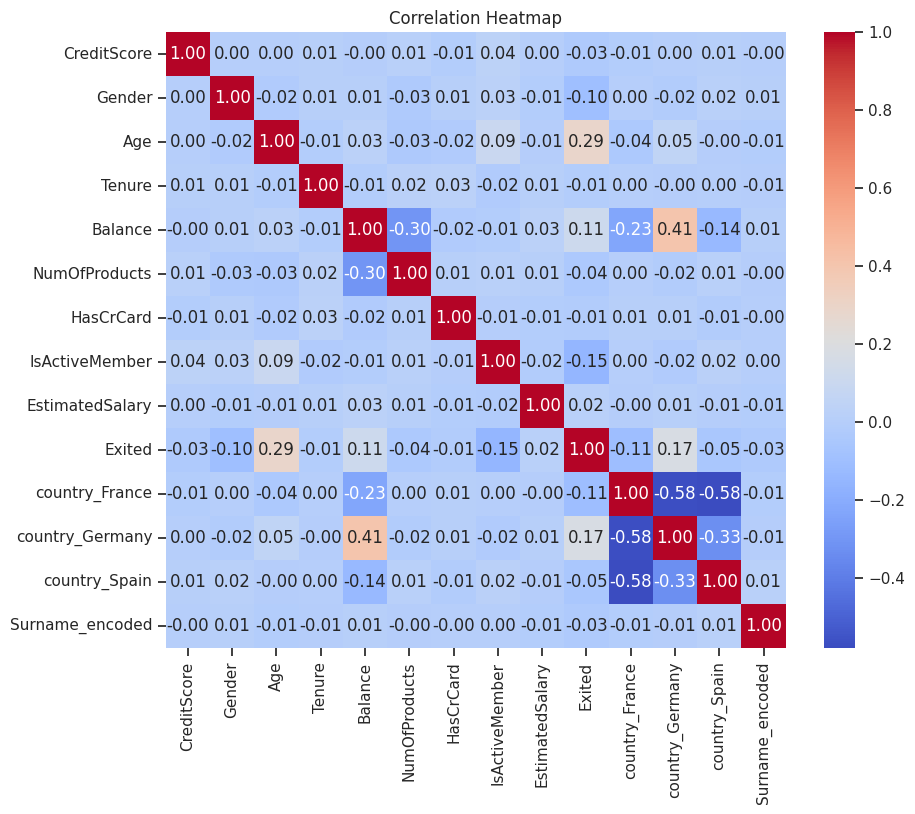

In [74]:
# Create a heatmap to visualize the correlations, using a 'coolwarm' color scheme
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size for better visualization
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The target variable doesn't show strong correlations with any of the features, but there are some subtle linear connections.

For continuous features like Age and Balance, there are slight associations with the target variable.

Among the categorical variables (Gender, IsActiveMember, country_Germany, and country_France), similar subtle relationships exist with the target variable.

#### Individual Features versus Their Distibution across Target Variable Values

<Axes: xlabel='Exited', ylabel='Age'>

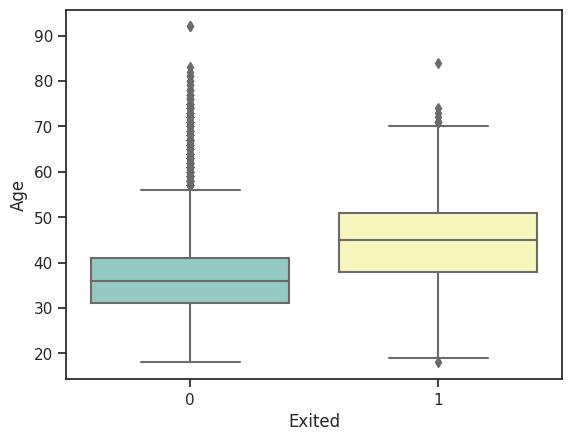

In [75]:
# Visualize the relationship between the 'Exited' target variable and the 'Age' feature using a boxplot
sns.boxplot(x="Exited", y="Age", data=df_train, palette="Set3")

<Axes: xlabel='Exited', ylabel='Balance'>

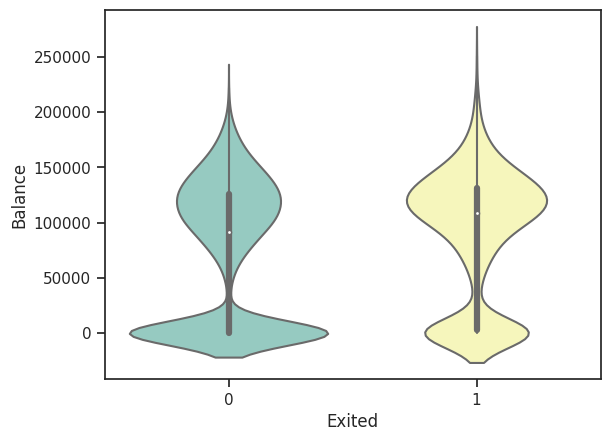

In [76]:
# Visualize the relationship between the 'Exited' target variable and the 'Balance' feature using a violin plot
sns.violinplot(x="Exited", y="Balance", data=df_train, palette="Set3")

In [77]:
# Check the average 'Exited' values for categorical features with the target variable
categorical_features = ['Gender', 'IsActiveMember', 'country_Germany', 'country_France']

for category in categorical_features:
    # Group the data by the current categorical feature and calculate the mean of 'Exited' for each group
    df_train.groupby([category]).Exited.mean()

Gender
0    0.248191
1    0.165511
Name: Exited, dtype: float64

IsActiveMember
0    0.266285
1    0.143557
Name: Exited, dtype: float64

country_Germany
0.0    0.163091
1.0    0.324974
Name: Exited, dtype: float64

country_France
0.0    0.245877
1.0    0.160593
Name: Exited, dtype: float64

In [78]:
# Calculate the average 'Exited' values for the 'NumOfProducts' feature
feature = 'NumOfProducts'
df_train.groupby([feature]).Exited.mean()

NumOfProducts
1    0.273428
2    0.076881
3    0.825112
4    1.000000
Name: Exited, dtype: float64

In [79]:
# Count the occurrences of each value in the 'NumOfProducts' feature
df_train[feature].value_counts()

1    4023
2    3629
3     223
4      45
Name: NumOfProducts, dtype: int64

### Performing Basic Feature Engineering

In [80]:
# Displaying the column names of the training DataFrame
column_names = df_train.columns
print(column_names)

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'country_France', 'country_Germany', 'country_Spain',
       'Surname_encoded'],
      dtype='object')


Generating novel attributes by considering basic relationships among the current attributes:

1. Combining the Balance and NumOfProducts.
2. Correlating the Balance with EstimatedSalary.
3. Examining the Tenure in relation to Age.
4. Calculating the product of Age and Surname_enc.

Code below manipulates a DataFrame ('df_train') by creating four new columns based on relationships between existing columns. It also checks for missing values in the new columns and visualizes their linear associations with the target variable 'Exited' using a heatmap.

In [81]:
# Define a small value for epsilon to avoid division by zero
eps = 1e-6

In [82]:
# Step 1: Combine 'Balance' and 'NumOfProducts' to create a new attribute 'bal_per_product'
df_train['bal_per_product'] = df_train['Balance'] / (df_train['NumOfProducts'] + eps)

# Step 2: Correlate 'Balance' with 'EstimatedSalary' to create a new attribute 'bal_by_est_salary'
df_train['bal_by_est_salary'] = df_train['Balance'] / (df_train['EstimatedSalary'] + eps)

# Step 3: Examine the relationship between 'Tenure' and 'Age' by creating a new attribute 'tenure_age_ratio'
df_train['tenure_age_ratio'] = df_train['Tenure'] / (df_train['Age'] + eps)

# Step 4: Calculate the product of the square root of 'Age' and 'Surname_encoded' to create 'age_surname_mean_churn'
df_train['age_surname_mean_churn'] = np.sqrt(df_train['Age']) * df_train['Surname_encoded']

In [83]:
# Display the first few rows of the DataFrame
df_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_encoded,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
0,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000,58932.395534,4.267519,0.027778,0.000000
1,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000,125167.614832,0.628653,0.185185,0.000000
2,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.222222,0.000000,0.000000,0.200000,1.490712
3,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.300000,0.000000,0.000000,0.166667,1.643168
4,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.500000,0.000000,0.000000,0.181818,2.345208


In [84]:
# Define a list of the newly created columns
new_cols = ['bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio', 'age_surname_mean_churn']

# Check for missing values in the new columns
missing_values = df_train[new_cols].isnull().sum()

<Axes: >

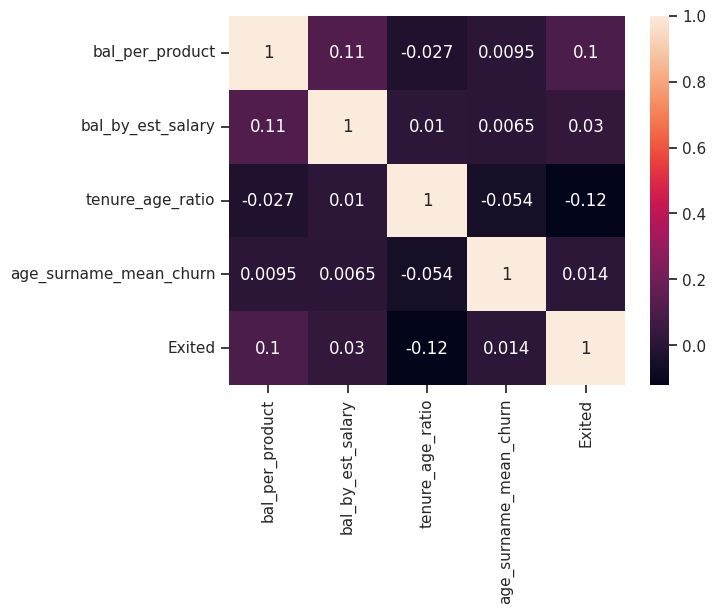

In [85]:
# Step 5: Visualize the linear associations between the new columns and the target variable 'Exited'
# using a heatmap
heatmap_data = df_train[new_cols + ['Exited']].corr()
sns.heatmap(heatmap_data, annot=True)

Among the recently introduced features, those exhibiting a modest linear connection or correlation include bal_per_product and the ratio of tenure to age, known as tenure_age_ratio.

In [86]:
# Calculate a small epsilon value to avoid division by zero
eps = 1e-6

# Create new interaction features for the validation set
df_val['bal_per_product'] = df_val['Balance'] / (df_val['NumOfProducts'] + eps)
df_val['bal_by_est_salary'] = df_val['Balance'] / (df_val['EstimatedSalary'] + eps)
df_val['tenure_age_ratio'] = df_val['Tenure'] / (df_val['Age'] + eps)
df_val['age_surname_mean_churn'] = np.sqrt(df_val['Age']) * df_val['Surname_encoded']

# Create the same new interaction features for the test set
df_test['bal_per_product'] = df_test['Balance'] / (df_test['NumOfProducts'] + eps)
df_test['bal_by_est_salary'] = df_test['Balance'] / (df_test['EstimatedSalary'] + eps)
df_test['tenure_age_ratio'] = df_test['Tenure'] / (df_test['Age'] + eps)
df_test['age_surname_mean_churn'] = np.sqrt(df_test['Age']) * df_test['Surname_encoded']

### 11. Feature scaling and Normalisation

Explanation of Feature Scaling and Normalization Methods:

1. Feature Transformations - Employing functions such as logarithm, base-10 logarithm, square root, or raising to a power to modify feature values.
2. MinMaxScaler - Adjusts feature values to fall within the range of 0 to 1.
3. StandardScaler - Normalizes features by centering them around their mean and expressing them in terms of their standard deviation, providing z-score estimates for the values.

Explanation of the Need for Scaling and Normalization:

Scaling and normalization are essential because they help make data suitable for various machine learning algorithms. By applying these techniques, we can ensure that features are on a similar scale, which prevents certain features from dominating the learning process due to their larger magnitude. This, in turn, can lead to more accurate and stable model training, especially for algorithms sensitive to the scale of features, like gradient-based optimization methods.

Explanation of Normalizing Unseen Data:

When normalizing unseen data (e.g., test or validation data), you should follow the same scaling parameters used on the training data. Specifically:

1. **MinMaxScaler**: Calculate the minimum and maximum values from the training data and apply the same scaling transformation to the unseen data.

2. **StandardScaler**: Compute the mean and standard deviation from the training data and use these statistics to normalize the unseen data in the same way.

It's crucial to maintain consistency in scaling methods between the training and unseen data to ensure that the model interprets them in a compatible manner.

#### Feature Transformations

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

Text(0.5, 0, 'Original EstimatedSalary')

Text(0, 0.5, 'Density')

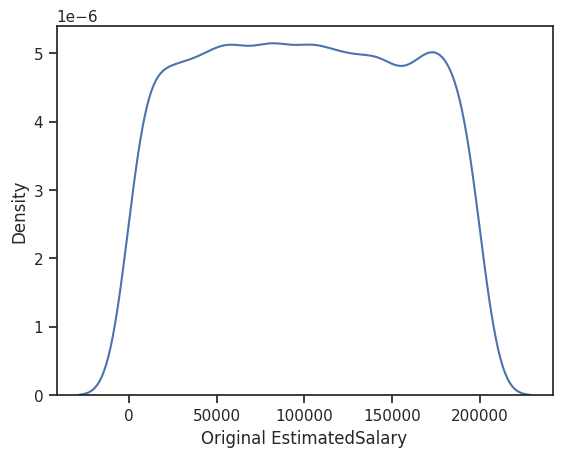

In [87]:
# Plot the distribution of EstimatedSalary
sns.distplot(df_train['EstimatedSalary'], hist=False, label='Original')
plt.xlabel('Original EstimatedSalary')
plt.ylabel('Density')

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

Text(0.5, 0, 'Square Root Transformed EstimatedSalary')

Text(0, 0.5, 'Density')

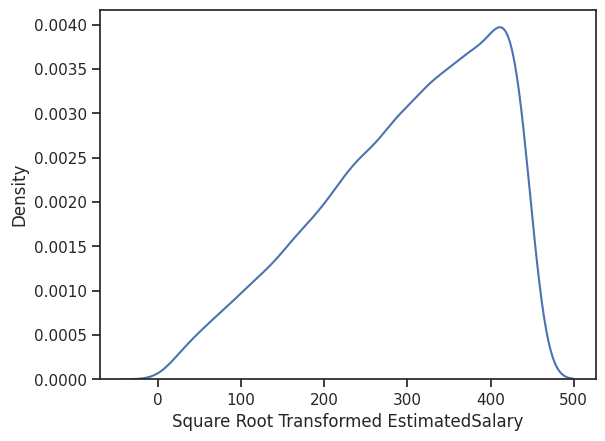

In [88]:
# Apply the square root transformation to EstimatedSalary and plot its distribution
sns.distplot(np.sqrt(df_train['EstimatedSalary']), hist=False, label='Square Root Transformed')
plt.xlabel('Square Root Transformed EstimatedSalary')
plt.ylabel('Density')

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

Text(0.5, 0, 'Log Transformed EstimatedSalary')

Text(0, 0.5, 'Density')

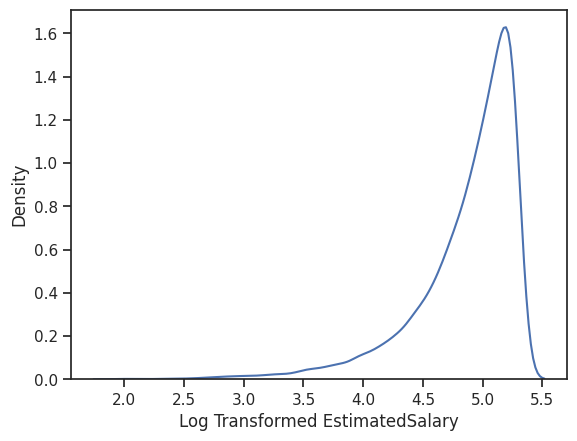

In [89]:
# Apply the log transformation with a small offset to EstimatedSalary and plot its distribution
sns.distplot(np.log10(1 + df_train['EstimatedSalary']), hist=False, label='Log Transformed')
plt.xlabel('Log Transformed EstimatedSalary')
plt.ylabel('Density')

#### StandardScaler

In [90]:
# Import the StandardScaler class from the sklearn.preprocessing module.
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class.
scaler = StandardScaler()

Scaling only Continuous Variables

In [91]:
# Define the list of continuous variables to be scaled
continuous_vars = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
    'EstimatedSalary', 'Surname_encoded', 'bal_per_product',
    'bal_by_est_salary', 'tenure_age_ratio', 'age_surname_mean_churn'
]

# Define the list of categorical variables (which will remain unchanged)
categorical_vars = [
    'Gender', 'HasCrCard', 'IsActiveMember',
    'country_France', 'country_Germany', 'country_Spain'
]

In [92]:
# Fit and transform the training data for continuous variables
scaled_train_continuous = scaler.fit_transform(df_train[continuous_vars])

# Convert the scaled training data from an array to a DataFrame with appropriate column names
scaled_train_continuous_df = pd.DataFrame(data=scaled_train_continuous, columns=continuous_vars)

# Get the shape and display the first few rows of the scaled training data
scaled_train_continuous_df.shape
scaled_train_continuous_df.head()

(7920, 11)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Surname_encoded,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
0,0.284761,-0.274383,-1.389130,0.670778,0.804059,-1.254732,-1.079210,-0.062389,0.095448,-1.232035,-1.062507
1,-0.389351,-1.128482,-0.004763,0.787860,-0.912423,1.731950,-1.079210,1.104840,-0.118834,0.525547,-1.062507
2,-0.233786,0.579716,1.379604,-1.218873,0.804059,-0.048751,0.094549,-1.100925,-0.155854,0.690966,0.193191
3,-1.426446,-0.843782,-0.004763,-1.218873,0.804059,1.094838,0.505364,-1.100925,-0.155854,0.318773,0.321611
4,-0.119706,-1.602981,-0.350855,-1.218873,0.804059,-1.244806,1.561746,-1.100925,-0.155854,0.487952,0.912973


In [93]:
# Store the mean and standard deviation mapping learned during training
scaling_mapping = {'mean': scaler.mean_, 'std': np.sqrt(scaler.var_)}

In [94]:
# Use the learned mapping to scale the validation and test sets
scaled_val_continuous = scaler.transform(df_val[continuous_vars])
scaled_test_continuous = scaler.transform(df_test[continuous_vars])

In [95]:
# Convert the scaled validation and test data from arrays to DataFrames
scaled_val_continuous_df = pd.DataFrame(data=scaled_val_continuous, columns=continuous_vars)
scaled_test_continuous_df = pd.DataFrame(data=scaled_test_continuous, columns=continuous_vars)

Feature scaling plays a crucial role in algorithms such as Logistic Regression and SVM, but it is not essential for tree-based models.

### 12. Feature selection - RFE

Feature selection using Recursive Feature Elimination (RFE) aims to refine our initial list of features, which were shortlisted based on exploratory data analysis (EDA), manual inspection, and bivariate analysis. This initial list includes:

- Age
- Gender
- Balance
- Number of Products
- IsActiveMember
- The three country/geography variables
- Balance per Product
- Tenure-Age Ratio

Now, we'll employ RFE, in combination with a Logistic Regression (LogReg) model, to determine whether it confirms our existing list of features, adds new ones, or reduces the number of features. In this initial step, we'll input all these features into the RFE + LogReg model for evaluation.

In [96]:
# Display the list of continuous variables to be scaled
continuous_vars

# Display the list of categorical variables (which will remain unchanged)
categorical_vars

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Surname_encoded',
 'bal_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain']

In [97]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [98]:
# Step 1: Prepare the target variable and feature set
# In this step, we create the target variable 'y' and the feature set 'X' from the training data.
y = df_train['Exited'].values
X = df_train[categorical_vars + continuous_vars]  # Combine categorical and continuous variables into 'X'

In [99]:
# Step 2: Feature selection using RFE with Logistic Regression
# Create a Logistic Regression estimator
est_logistic = LogisticRegression()
num_features_to_select_logistic = 10  # Select 10 features for logistic regression

# Perform RFE with logistic regression
rfe_logistic = RFE(est_logistic, n_features_to_select=num_features_to_select_logistic)
rfe_logistic = rfe_logistic.fit(X.values, y)

# Print the support (selected features) and ranking of features for logistic regression
print("Selected features for Logistic Regression:")
print(rfe_logistic.support_)
print("Feature rankings for Logistic Regression:")
print(rfe_logistic.ranking_)

# Extract selected features for Logistic Regression
mask_logistic = rfe_logistic.support_.tolist()
selected_feats_logistic = [feature for feature, is_selected in zip(X.columns, mask_logistic) if is_selected]

Selected features for Logistic Regression:
[ True  True  True  True  True  True False  True False False  True False
  True False False  True False]
Feature rankings for Logistic Regression:
[1 1 1 1 1 1 4 1 3 6 1 8 1 7 5 1 2]


In [100]:
# Step 3: Feature selection using RFE with Decision Tree
# Create a Decision Tree classifier estimator
est_decision_tree = DecisionTreeClassifier(max_depth=4, criterion='entropy')
num_features_to_select_dt = 10  # Select 10 features for decision tree

# Perform RFE with decision tree classifier
rfe_decision_tree = RFE(est_decision_tree, n_features_to_select=num_features_to_select_dt)
rfe_decision_tree = rfe_decision_tree.fit(X.values, y)

# Print the support (selected features) and ranking of features for decision tree classifier
print("\nSelected features for Decision Tree Classifier:")
print(rfe_decision_tree.support_)
print("Feature rankings for Decision Tree Classifier:")
print(rfe_decision_tree.ranking_)

# Extract selected features for Decision Tree Classifier
mask_decision_tree = rfe_decision_tree.support_.tolist()
selected_feats_decision_tree = [feature for feature, is_selected in zip(X.columns, mask_decision_tree) if is_selected]


Selected features for Decision Tree Classifier:
[False False  True False  True False False  True False False  True  True
  True  True  True  True  True]
Feature rankings for Decision Tree Classifier:
[8 7 1 6 1 5 4 1 3 2 1 1 1 1 1 1 1]


In [101]:
# Step 4: Print the selected features for Logistic Regression and Decision Tree
print("\nSelected features for Logistic Regression:")
print(selected_feats_logistic)

print("\nSelected features for Decision Tree Classifier:")
print(selected_feats_decision_tree)


Selected features for Logistic Regression:
['Gender', 'HasCrCard', 'IsActiveMember', 'country_France', 'country_Germany', 'country_Spain', 'Age', 'NumOfProducts', 'Surname_encoded', 'tenure_age_ratio']

Selected features for Decision Tree Classifier:
['IsActiveMember', 'country_Germany', 'Age', 'NumOfProducts', 'EstimatedSalary', 'Surname_encoded', 'bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio', 'age_surname_mean_churn']


### 13. Model (1) (linear) : Logistic Regression

We'll use the features chosen through Recursive Feature Elimination (RFE) to train linear models.

#### Setting up the Data for Model Training

In [102]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [103]:
# Select categorical and continuous variables from the chosen features
selected_cat_vars = [x for x in selected_feats_logistic if x in categorical_vars]
selected_cont_vars = [x for x in selected_feats_logistic if x in continuous_vars]

In [104]:
# Combine categorical and scaled numerical features for training, validation, and test datasets
X_train = np.concatenate((df_train[selected_cat_vars].values, scaled_train_continuous_df[selected_cont_vars].values), axis=1)
X_val = np.concatenate((df_val[selected_cat_vars].values, scaled_val_continuous_df[selected_cont_vars].values), axis=1)
X_test = np.concatenate((df_test[selected_cat_vars].values, scaled_test_continuous_df[selected_cont_vars].values), axis=1)

In [105]:
# Check the shapes of the data matrices
X_train.shape, X_val.shape, X_test.shape

((7920, 10), (1080, 10), (1000, 10))

#### Addressing Class Imbalance

In [106]:
# Calculate class weights based on the class samples imbalance ratio
_, num_samples = np.unique(y_train, return_counts=True)
weights = np.max(num_samples) / num_samples

In [107]:
# Create a dictionary to store class weights
weights_dict = dict()
class_labels = [0, 1]

In [108]:
# Populate the weights dictionary
for label, weight in zip(class_labels, weights):
    weights_dict[label] = weight

In [109]:
# Display the class weights
weights_dict

{0: 1.0, 1: 3.925373134328358}

#### Model Training

In [110]:
# Define the logistic regression model with specified parameters
lr = LogisticRegression(C=1.0, penalty='l2', class_weight=weights_dict, n_jobs=-1)

In [111]:
# Fit the model on the training data
lr.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.0, 1: 3.925373134328358}, n_jobs=-1)

In [112]:
# Display the coefficients and intercept of the fitted model
coefficients = lr.coef_
intercept = lr.intercept_

#### Training Metrics

In [113]:
# Calculate ROC AUC score, recall, confusion matrix, and classification report on the training data
roc_auc_train = roc_auc_score(y_train, lr.predict(X_train))
recall_train = recall_score(y_train, lr.predict(X_train))
confusion_matrix_train = confusion_matrix(y_train, lr.predict(X_train))
classification_report_train = classification_report(y_train, lr.predict(X_train))

In [114]:
# Display the training metrics
roc_auc_train, recall_train, confusion_matrix_train, print(classification_report_train)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      6312
           1       0.38      0.70      0.50      1608

    accuracy                           0.71      7920
   macro avg       0.64      0.71      0.65      7920
weighted avg       0.80      0.71      0.74      7920



(0.70684363354331,
 0.6983830845771144,
 array([[4515, 1797],
        [ 485, 1123]]),
 None)

#### Validation Metrics

In [115]:
# Calculate ROC AUC score, recall, confusion matrix, and classification report on the validation data
roc_auc_val = roc_auc_score(y_val, lr.predict(X_val))
recall_val = recall_score(y_val, lr.predict(X_val))
confusion_matrix_val = confusion_matrix(y_val, lr.predict(X_val))
classification_report_val = classification_report(y_val, lr.predict(X_val))

In [116]:
# Display the validation metrics
roc_auc_val, recall_val, confusion_matrix_val, print(classification_report_val)

              precision    recall  f1-score   support

           0       0.89      0.70      0.79       842
           1       0.40      0.70      0.51       238

    accuracy                           0.70      1080
   macro avg       0.65      0.70      0.65      1080
weighted avg       0.78      0.70      0.72      1080



(0.7011966306712709,
 0.7016806722689075,
 array([[590, 252],
        [ 71, 167]]),
 None)

### 14. Model (2) (linear) : SVM/SVC

SVM (Support Vector Machine) and SVC (Support Vector Classifier) are terms that are often used interchangeably, and the distinction between them can sometimes be a source of confusion. In practice, SVM refers to the general framework of the algorithm, while SVC specifically refers to the application of SVM for classification tasks. Here are the key differences:

1. **SVM (Support Vector Machine):**
   - SVM is a broader concept that encompasses both classification (SVC) and regression (SVR) tasks.
   - It is a machine learning algorithm that aims to find an optimal hyperplane or decision boundary to separate data into different classes or predict a continuous target variable.

2. **SVC (Support Vector Classifier):**
   - SVC is a specific implementation of SVM used for classification tasks.
   - It focuses on finding the optimal hyperplane that best separates two or more classes in a dataset.

In summary, SVM is the overarching concept, while SVC is a specific type of SVM used for classification. When people refer to "SVM" in the context of classification, they often mean "SVC." However, when discussing regression tasks, SVM can also refer to "SVR" (Support Vector Regression), which is another variant of the SVM algorithm designed for regression tasks.

#### Setting up the Data for Model Training

In [117]:
# Import necessary libraries for building a linear Support Vector Classifier (SVC) model and evaluating its performance.
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [118]:
# Combine selected categorical and scaled numerical features for the training, validation, and test datasets.
X_train = np.concatenate((df_train[selected_cat_vars].values, scaled_train_continuous_df[selected_cont_vars].values), axis=1)
X_val = np.concatenate((df_val[selected_cat_vars].values, scaled_val_continuous_df[selected_cont_vars].values), axis=1)
X_test = np.concatenate((df_test[selected_cat_vars].values, scaled_test_continuous_df[selected_cont_vars].values), axis=1)

In [119]:
# Print the shapes of the concatenated datasets.
X_train.shape, X_val.shape, X_test.shape

((7920, 10), (1080, 10), (1000, 10))

In [120]:
# Define class weights for the SVM model. This gives more weight to class 1 compared to class 0.
weights_dict = {0: 1.0, 1: 3.92}
weights_dict

{0: 1.0, 1: 3.92}

#### Model Training

In [121]:
# Create an instance of the linear Support Vector Classifier (SVC) with specified parameters.
svm = SVC(C=1.0, kernel="linear", class_weight=weights_dict)

In [122]:
# Fit the SVM model to the training data.
svm.fit(X_train, y_train)

SVC(class_weight={0: 1.0, 1: 3.92}, kernel='linear')

In [123]:
# Print the coefficients and intercept of the fitted SVM model.
selected_cat_vars + selected_cont_vars
svm.coef_
svm.intercept_

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'Age',
 'NumOfProducts',
 'Surname_encoded',
 'tenure_age_ratio']

array([[-0.47123838, -0.05243176, -0.73091948, -0.30810139,  0.55354164,
        -0.24544025,  0.87513536, -0.04736244, -0.05559591, -0.03828547]])

array([0.4547244])

#### Training Metrics

In [124]:
# Calculate and print training metrics: ROC AUC, recall, confusion matrix, and classification report.
roc_auc_score(y_train, svm.predict(X_train))
recall_score(y_train, svm.predict(X_train))
confusion_matrix(y_train, svm.predict(X_train))
print(classification_report(y_train, svm.predict(X_train)))

0.712424096248794

0.6946517412935324

array([[4609, 1703],
       [ 491, 1117]])

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      6312
           1       0.40      0.69      0.50      1608

    accuracy                           0.72      7920
   macro avg       0.65      0.71      0.66      7920
weighted avg       0.80      0.72      0.75      7920



#### Validation Metrics

In [125]:
# Calculate and print validation metrics: ROC AUC, recall, confusion matrix, and classification report.
roc_auc_score(y_val, svm.predict(X_val))
recall_score(y_val, svm.predict(X_val))
confusion_matrix(y_val, svm.predict(X_val))
print(classification_report(y_val, svm.predict(X_val)))

0.6984570550310385

0.6890756302521008

array([[596, 246],
       [ 74, 164]])

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       842
           1       0.40      0.69      0.51       238

    accuracy                           0.70      1080
   macro avg       0.64      0.70      0.65      1080
weighted avg       0.78      0.70      0.73      1080



### 15. Visualising Decision Boundaries of Linear Models

To visualize the decision boundaries of classification models in a two-dimensional (2-D) space, we must initially train these models using data that is represented in two dimensions. However, most real-world data typically has more than two features or dimensions. In such cases, a recommended approach is to utilize the existing dataset, which may have more than two features, and employ dimensionality reduction techniques such as Principal Component Analysis (PCA). By applying PCA, we can reduce the number of features while retaining important information, effectively transforming the high-dimensional data into a lower-dimensional representation. Subsequently, we can train our classification models using this reduced-feature dataset, allowing us to visualize their decision boundaries in a 2-D space more easily.

Explanation:
- Decision boundaries are the borders or lines that separate different classes or categories in a classification problem. Visualizing these decision boundaries is helpful for understanding how a model makes predictions.
- Linear models are a type of machine learning model that work well for tasks like classification, where the goal is to separate data points into different classes using linear equations.
- To visualize these decision boundaries in a 2-D space, we need to work with data that has only two features (dimensions). However, many real-world datasets have more than two features, making visualization challenging.
- Dimensionality reduction techniques like PCA can transform high-dimensional data into a lower-dimensional space while preserving important information. This allows us to reduce the data to two dimensions and then visualize it.
- Once we have this reduced-feature dataset, we can train our linear classification models on it, making it possible to plot and understand their decision boundaries in a 2-D space, which is more visually interpretable.

#### Importing Libraries

In [126]:
# Import necessary libraries
from sklearn.decomposition import PCA

#### PCA Initialization and Transformation

In [127]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Transform the training data using PCA
X_pca = pca.fit_transform(X_train)
y = y_train

#### Checking Data Shapes

In [128]:
# Check the shapes of the transformed data and labels
print("Shape of X_train:", X_train.shape)
print("Shape of X_pca:", X_pca.shape)
print("Shape of y:", y.shape)

Shape of X_train: (7920, 10)
Shape of X_pca: (7920, 2)
Shape of y: (7920,)


#### Variance Explained Calculation

In [129]:
# Check the variance explained by the reduced features
explained_variance = pca.explained_variance_ratio_

#### Mesh Grid Setup

In [130]:
# Define the mesh grid for plotting the decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

#### Model Initialization and Training

In [131]:
# Initialize and fit Logistic Regression and SVM models on the reduced features
lr = LogisticRegression()
lr.fit(X_pca, y)

svm = SVC()
svm.fit(X_pca, y)

LogisticRegression()

SVC()

#### Decision Boundary Prediction

In [132]:
# Predict the decision boundaries for LR and SVM
z1 = lr.predict(np.c_[xx.ravel(), yy.ravel()])
z1 = z1.reshape(xx.shape)

z2 = svm.predict(np.c_[xx.ravel(), yy.ravel()])
z2 = z2.reshape(xx.shape)

#### Plotting the Results

<Axes: >

Text(0.5, 1.0, 'Linear models - Logistic Regression and SVM Decision Boundaries')

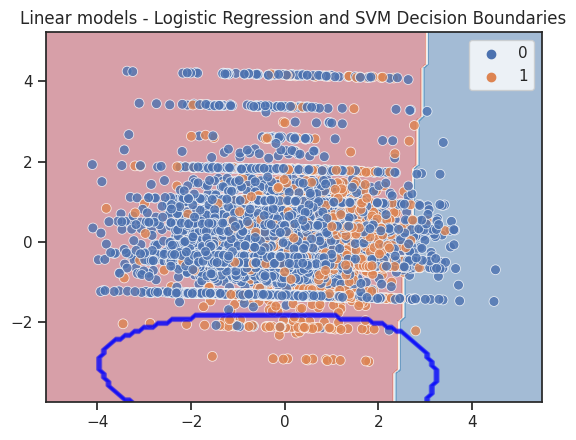

In [133]:
# Display the result
plt.contourf(xx, yy, z1, alpha=0.4, cmap=plt.cm.RdBu) # Plot LR decision boundary
plt.contour(xx, yy, z2, alpha=0.4, colors='blue') # Plot SVM decision boundary
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, s=50, alpha=0.8)
plt.title('Linear models - Logistic Regression and SVM Decision Boundaries')

# Show the plot
plt.show()

### 16. Model (3) (non-linear) : Decision Tree

#### Setting up the Data for Model Training

In [134]:
# Import necessary libraries and modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

# Define class weights for the model
class_weights = {0: 1.0, 1: 3.92}

# Display the defined class weights
class_weights

{0: 1.0, 1: 3.92}

#### Feature Selection

In [135]:
# The selected features obtained from a Recursive Feature Elimination (RFE) process
selected_feats_decision_tree

# Reassign selected features to training and validation data
X_train = df_train[selected_feats_decision_tree].values
X_val = df_val[selected_feats_decision_tree].values

# Display the shapes of X_train and X_val along with their respective label shapes
X_train.shape, y_train.shape
X_val.shape, y_val.shape

['IsActiveMember',
 'country_Germany',
 'Age',
 'NumOfProducts',
 'EstimatedSalary',
 'Surname_encoded',
 'bal_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

((7920, 10), (7920,))

((1080, 10), (1080,))

#### Model Training

In [136]:
# Create a Decision Tree Classifier with specified hyperparameters
clf = DecisionTreeClassifier(criterion='entropy', class_weight=class_weights, max_depth=4,
                            max_features=None, min_samples_split=25, min_samples_leaf=15)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.92}, criterion='entropy',
                       max_depth=4, min_samples_leaf=15, min_samples_split=25)

#### Feature Importance Analysis

In [137]:
# Calculate and display feature importance scores
importance_df = pd.DataFrame({'features': selected_feats_decision_tree,
                              'importance': clf.feature_importances_}).sort_values(by='importance', ascending=False)

#### Training Metrics

In [138]:
# Calculate and display training metrics
train_roc_auc = roc_auc_score(y_train, clf.predict(X_train))
train_recall = recall_score(y_train, clf.predict(X_train))
train_confusion_matrix = confusion_matrix(y_train, clf.predict(X_train))
train_classification_report = classification_report(y_train, clf.predict(X_train))

# Print the training metrics
print("Training Metrics:")
print(f"ROC AUC Score: {train_roc_auc}")
print(f"Recall Score: {train_recall}")
print("Confusion Matrix:")
print(train_confusion_matrix)
print("Classification Report:")
print(train_classification_report)

Training Metrics:
ROC AUC Score: 0.7514707829672929
Recall Score: 0.7369402985074627
Confusion Matrix:
[[4835 1477]
 [ 423 1185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      6312
           1       0.45      0.74      0.56      1608

    accuracy                           0.76      7920
   macro avg       0.68      0.75      0.70      7920
weighted avg       0.82      0.76      0.78      7920



#### Validation Metrics

In [139]:
# Calculate and display validation metrics
val_roc_auc = roc_auc_score(y_val, clf.predict(X_val))
val_recall = recall_score(y_val, clf.predict(X_val))
val_confusion_matrix = confusion_matrix(y_val, clf.predict(X_val))
val_classification_report = classification_report(y_val, clf.predict(X_val))

# Print the validation metrics
print("Validation Metrics:")
print(f"ROC AUC Score: {val_roc_auc}")
print(f"Recall Score: {val_recall}")
print("Confusion Matrix:")
print(val_confusion_matrix)
print("Classification Report:")
print(val_classification_report)

Validation Metrics:
ROC AUC Score: 0.7477394758378411
Recall Score: 0.7436974789915967
Confusion Matrix:
[[633 209]
 [ 61 177]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       842
           1       0.46      0.74      0.57       238

    accuracy                           0.75      1080
   macro avg       0.69      0.75      0.70      1080
weighted avg       0.81      0.75      0.77      1080



### 17. Visualise Decision Boundaries of Non-Linear Models

#### Import necessary libraries and initialize PCA

In [140]:
from sklearn.decomposition import PCA # Import PCA library from Sk-Learn

pca = PCA(n_components=2) # Initialize PCA with two components

#### Transform the dataset using PCA

In [141]:
# X_train is the input data, and we want to reduce it to 2 dimensions
X_transformed = pca.fit_transform(X_train)
y = y_train

# Check the shape of the transformed dataset and the target labels
num_samples, num_features = X_transformed.shape
print("Shape of transformed data:", num_samples, "samples x", num_features, "features")
print("Shape of target labels:", y.shape)

Shape of transformed data: 7920 samples x 2 features
Shape of target labels: (7920,)


#### Check the variance explained by the reduced features

In [142]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratios:", explained_variance)

Explained variance ratios: [0.51069916 0.48930078]


#### Create a meshgrid to visualize decision boundaries

In [143]:
x_min, x_max = X_transformed[:, 0].min() - 1, X_transformed[:, 0].max() + 1
y_min, y_max = X_transformed[:, 1].min() - 1, X_transformed[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 100),
                     np.arange(y_min, y_max, 100))

#### Fit a classification model (clf) to the reduced-dimensional data

In [144]:
clf.fit(X_transformed, y)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.92}, criterion='entropy',
                       max_depth=4, min_samples_leaf=15, min_samples_split=25)

#### Predict and reshape the decision boundaries

In [145]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

#### Display the decision boundary and the scatter plot of data points

<Axes: >

Text(0.5, 1.0, 'Decision Tree')

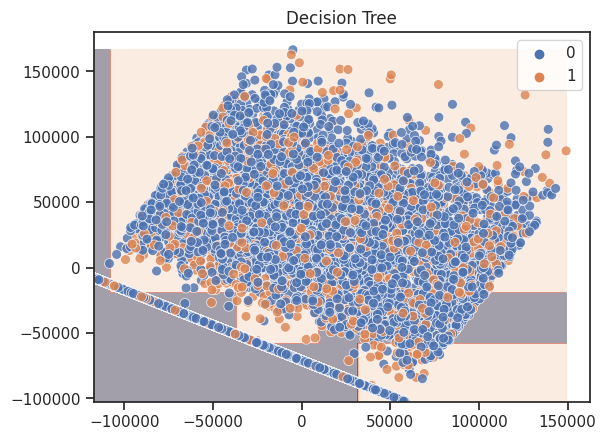

In [146]:
plt.contourf(xx, yy, z, alpha=0.4)  # Plot the decision boundary
sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue=y_train, s=50, alpha=0.8)  # Scatter plot of data points
plt.title('Decision Tree')  # Title of the plot

### 18. Decision Tree Rule Engine Visualisation

(Install Graphviz by running: 'brew install graphviz')

#### Import necessary libraries

In [147]:
# In this section, we import the required libraries for building a decision tree classifier,
# exporting the tree as a graphical representation, and displaying the tree.

from sklearn.tree import export_graphviz  # Import the export_graphviz function from the scikit-learn library.
import subprocess  # Import the subprocess module to run external commands.

#### Create and train a Decision Tree classifier

In [148]:
# In this section, we create a DecisionTreeClassifier with specified parameters and train it on our dataset.

# Create a DecisionTreeClassifier with the following parameters:
# - criterion: 'entropy' for selecting the splitting criterion based on information gain.
# - class_weight: A dictionary called 'weights_dict' for assigning class weights.
# - max_depth: Set the maximum depth of the tree to 3 levels.
# - max_features: No specific limit on the maximum number of features considered for splitting.
# - min_samples_split: Require at least 25 samples for a node to be split.
# - min_samples_leaf: Require at least 15 samples in a leaf node.
clf = DecisionTreeClassifier(
    criterion='entropy',
    class_weight=weights_dict,
    max_depth=3,
    max_features=None,
    min_samples_split=25,
    min_samples_leaf=15
)

# Fit the Decision Tree classifier to the training data (X_train, y_train).
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.92}, criterion='entropy',
                       max_depth=3, min_samples_leaf=15, min_samples_split=25)

#### Export the Decision Tree as a dot file

In [149]:
# In this section, we export the trained Decision Tree as a dot file for visualization.

# Export the Decision Tree to a dot file named 'tree.dot'.
# - feature_names: Names of selected features for labeling nodes.
# - class_names: Names of classes ('Did not churn' and 'Churned') for labeling leaf nodes.
# - rounded: Round the displayed values.
# - proportion: Do not display proportions at the leaf nodes.
# - precision: Set precision for displayed values to 2 decimal places.
# - filled: Fill the nodes with color based on class distribution.
dot_data = export_graphviz(
    clf,
    out_file='tree.dot',
    feature_names=selected_feats_decision_tree,
    class_names=['Did not churn', 'Churned'],
    rounded=True,
    proportion=False,
    precision=2,
    filled=True
)

#### Convert the dot file to a PNG image

In [150]:
# In this section, we use Graphviz to convert the dot file into a PNG image.

# Use the 'dot' command from Graphviz to convert 'tree.dot' to 'tree.png' with a resolution of 600 DPI.
subprocess.run(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

CompletedProcess(args=['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'], returncode=0)

#### Display the generated Decision Tree

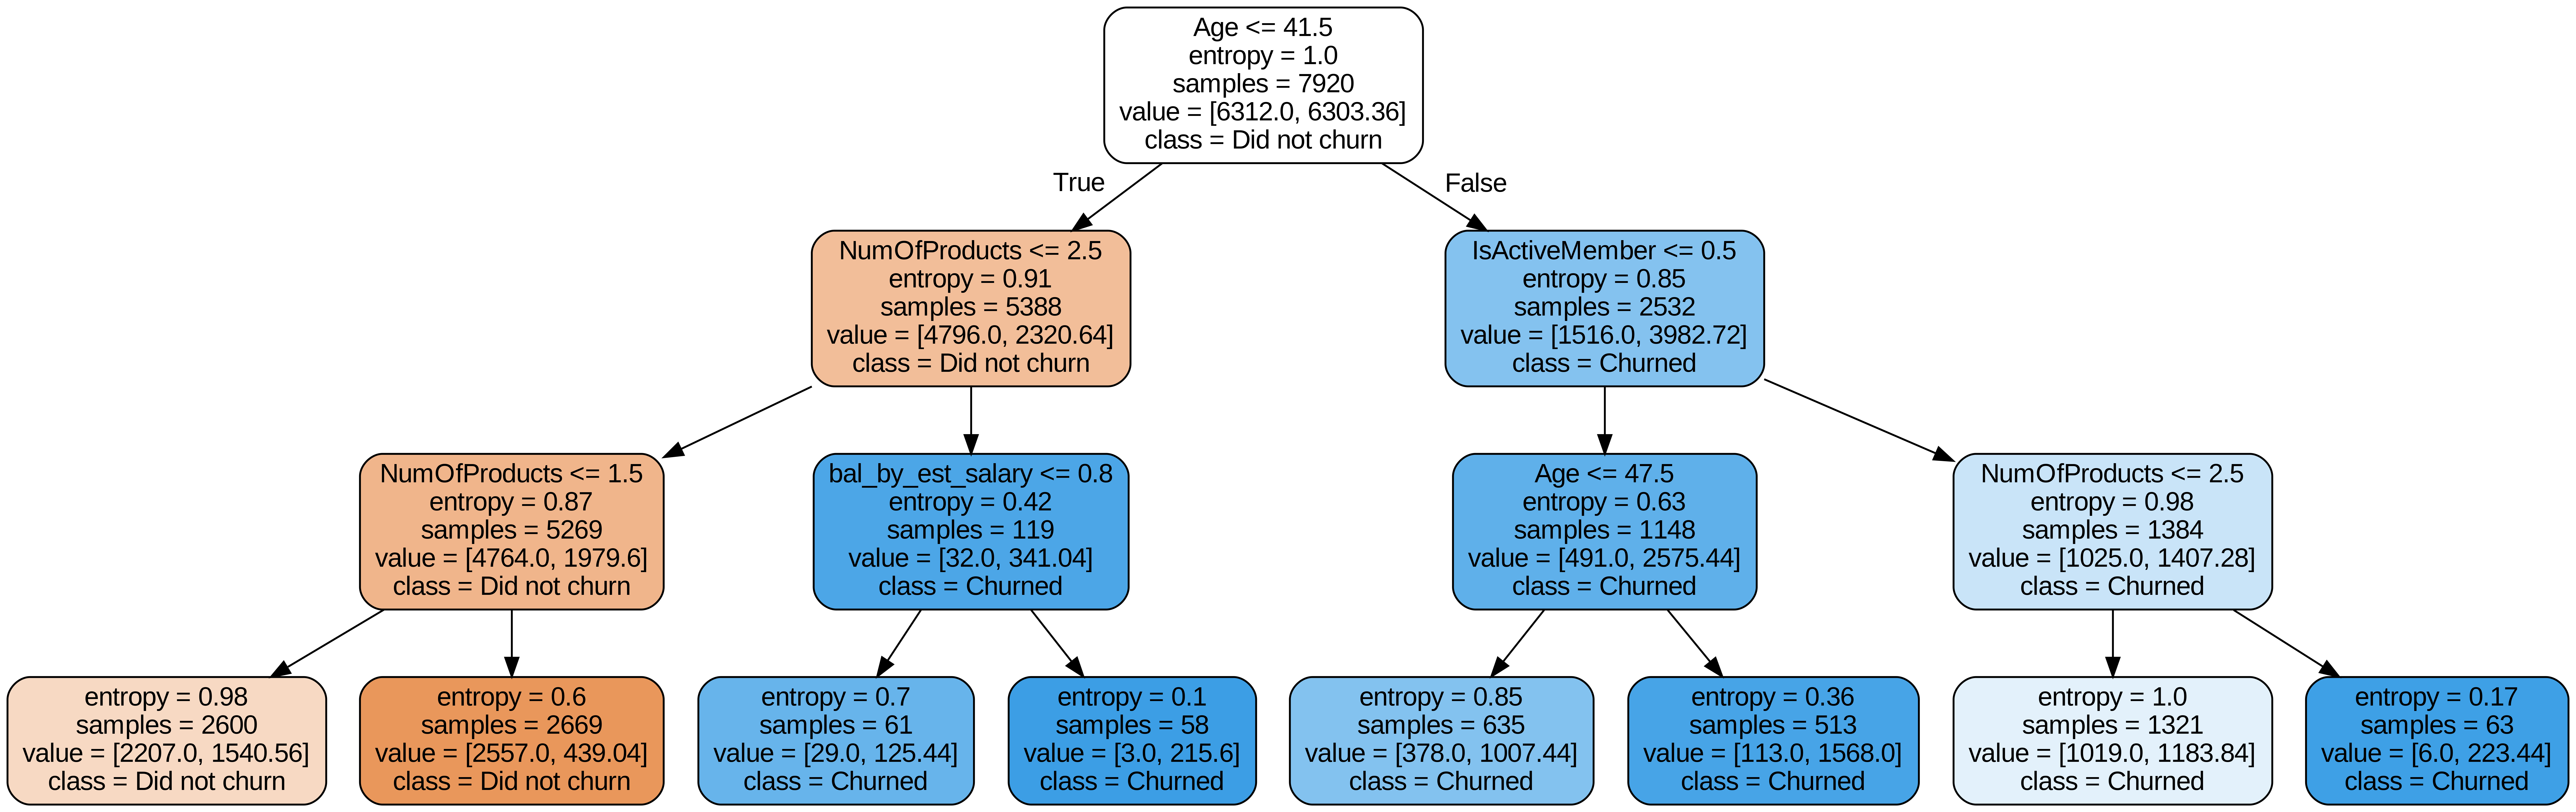

In [151]:
# In this section, we display the graphical representation of the Decision Tree.

# Display the generated Decision Tree image in the IPython environment.
from IPython.display import Image
Image(filename='tree.png')

# Code-Style Solution Program

Building (classes and functions) for assessing multiple machine learning algorithms through spot-checking. Steps:
- Step 1 : Automated Pipelines for (Data Preparation & Model Execution)
- Step 2 : Maintain Model Zoo: Inventory of All Models for Comparison
- Step 3 : Evaluate Models' Performance using K-Fold Cross Validation

### 1. Automated Pipelines for (Data Preparation & Model Execution)

In [152]:
from sklearn.base import BaseEstimator, TransformerMixin

Defining a custom class called CategoricalEncoder, which is designed for encoding categorical columns in a dataset. The encoding methods used include Label Encoding, One-Hot Encoding, and Target Encoding, and the choice of method depends on the cardinality (number of distinct values) of each categorical column.

This class allows you to encode categorical columns in a DataFrame using different encoding strategies based on the cardinality of the columns. It provides flexibility in choosing encoding methods and can be used as part of data preparation and model execution pipelines.

In [153]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """
    Custom encoder for categorical columns, supporting Label Encoding, One-Hot Encoding,
    and Target Encoding based on cardinality.

    Parameters:
    - cols: List of columns to encode (default is all categorical columns).
    - lcols: List of columns to encode using Label Encoding.
    - ohecols: List of columns to encode using One-Hot Encoding.
    - tcols: List of columns to encode using Target Encoding.
    - reduce_df: Whether to reduce degrees of freedom for encoding (default is False).

    The encoder provides 'fit', 'transform', and 'fit_transform' methods.
    """

    def __init__(self, cols=None, lcols=None, ohecols=None, tcols=None, reduce_df=False):
        """
        Initialize the encoder with specified column lists and encoding options.
        """
        # Store provided column lists or use default if not specified
        self.cols = [cols] if isinstance(cols, str) else cols
        self.lcols = [lcols] if isinstance(lcols, str) else lcols
        self.ohecols = [ohecols] if isinstance(ohecols, str) else ohecols
        self.tcols = [tcols] if isinstance(tcols, str) else tcols
        self.reduce_df = reduce_df

    def fit(self, X, y):
        """
        Fit the encoder to the data and target values.

        Parameters:
        - X: DataFrame with columns to encode.
        - y: Target values.

        Returns:
        - self: Returns the fitted encoder object.
        """
        # Handle default columns if not specified
        if self.cols is None:
            self.cols = [c for c in X if str(X[c].dtype) == 'object']

        # Check if specified columns are present in X
        for col in self.cols:
            if col not in X:
                raise ValueError(f"Column '{col}' not found in X")

        # Separate columns into Label Encoding, One-Hot Encoding, and Target Encoding
        if self.lcols is None:
            self.lcols = [c for c in self.cols if X[c].nunique() <= 2]
        if self.ohecols is None:
            self.ohecols = [c for c in self.cols if 2 < X[c].nunique() <= 10]
        if self.tcols is None:
            self.tcols = [c for c in self.cols if X[c].nunique() > 10]

        # Create encoding mappings for Label Encoding
        self.lmaps = dict()
        for col in self.lcols:
            self.lmaps[col] = dict(zip(X[col].values, X[col].astype('category').cat.codes.values))

        # Create encoding mappings for One-Hot Encoding
        self.ohemaps = dict()
        for col in self.ohecols:
            self.ohemaps[col] = list(X[col].unique())
            if self.reduce_df:
                del self.ohemaps[col][-1]

        # Create encoding mappings for Target Encoding
        self.global_target_mean = y.mean().round(2)
        self.sum_count = dict()
        for col in self.tcols:
            self.sum_count[col] = dict()
            uniques = X[col].unique()
            for unique in uniques:
                ix = X[col] == unique
                self.sum_count[col][unique] = (y[ix].sum(), ix.sum())

        return self

    def transform(self, X, y=None):
        """
        Transform the input DataFrame using the fitted encoder.

        Parameters:
        - X: DataFrame with columns to encode.
        - y: Target values (required for Target Encoding, optional for One-Hot Encoding).

        Returns:
        - Xo: Transformed DataFrame with encoded columns.
        """
        Xo = X.copy()

        # Label Encoding transformation
        for col, lmap in self.lmaps.items():
            Xo[col] = Xo[col].map(lmap)
            Xo[col].fillna(-1, inplace=True)

        # One-Hot Encoding transformation
        for col, vals in self.ohemaps.items():
            for val in vals:
                new_col = col + '_' + str(val)
                Xo[new_col] = (Xo[col] == val).astype('uint8')
            del Xo[col]

        # Target Encoding transformation (Leave-One-Out for test data)
        if y is None:
            for col in self.sum_count:
                vals = np.full(X.shape[0], np.nan)
                for cat, sum_count in self.sum_count[col].items():
                    vals[X[col] == cat] = (sum_count[0] / sum_count[1]).round(2)
                Xo[col] = vals
                Xo[col].fillna(self.global_target_mean, inplace=True)

        # Target Encoding transformation (Full encoding for training data)
        else:
            for col in self.sum_count:
                vals = np.full(X.shape[0], np.nan)
                for cat, sum_count in self.sum_count[col].items():
                    ix = X[col] == cat
                    if sum_count[1] > 1:
                        vals[ix] = ((sum_count[0] - y[ix].reshape(-1,)) / (sum_count[1] - 1)).round(2)
                    else:
                        vals[ix] = ((y.sum() - y[ix]) / (X.shape[0] - 1)).round(2)
                Xo[col] = vals
                Xo[col].fillna(self.global_target_mean, inplace=True)

        return Xo

    def fit_transform(self, X, y=None):
        """
        Fit and transform the input data using the encoder.

        Parameters:
        - X: DataFrame with columns to encode.
        - y: Target values (required for Target Encoding, optional for One-Hot Encoding).

        Returns:
        - Xo: Transformed DataFrame with encoded columns.
        """
        return self.fit(X, y).transform(X, y)

Defining a class called AddFeatures, which is part of an automated data preparation and model execution pipeline. This class is responsible for adding new engineered features to a DataFrame using the original categorical and numerical features.

In summary, this code defines a class that can be used in a machine learning pipeline to add new features to a DataFrame, enhancing the dataset for model training and evaluation. The eps parameter is used to avoid division by zero errors when creating the new features. The class provides methods for fitting and transforming the DataFrame, as well as a combined method for both fitting and transforming in a single step.

In [154]:
class AddFeatures(BaseEstimator):
    """
    Add new, engineered features using the original categorical and numerical features of the DataFrame.
    """

    def __init__(self, eps=1e-6):
        """
        Initialize the AddFeatures object with an optional small value 'eps' to avoid divide by zero errors.
        The default value for 'eps' is 0.000001.
        """
        self.eps = eps

    def fit(self, X, y=None):
        """
        This method is required by the scikit-learn estimator interface but does not perform any fitting.
        It simply returns the object itself.
        """
        return self

    def transform(self, X):
        """
        Transform the input DataFrame by adding four new columns:
        1. 'bal_per_product': Balance divided by the number of products, with 'eps' added to the denominator.
        2. 'bal_by_est_salary': Balance divided by the estimated salary, with 'eps' added to the denominator.
        3. 'tenure_age_ratio': Tenure divided by age, with 'eps' added to the denominator.
        4. 'age_surname_enc': The square root of age multiplied by Surname_enc.

        Parameters:
        - X: pandas DataFrame, shape [n_samples, n_columns]
          DataFrame containing base columns from which new interaction-based features are engineered.

        Returns:
        - Xo: pandas DataFrame, shape [n_samples, n_columns + 4]
          The updated DataFrame with the new features.
        """
        Xo = X.copy()
        Xo['bal_per_product'] = Xo.Balance / (Xo.NumOfProducts + self.eps)
        Xo['bal_by_est_salary'] = Xo.Balance / (Xo.EstimatedSalary + self.eps)
        Xo['tenure_age_ratio'] = Xo.Tenure / (Xo.Age + self.eps)
        Xo['age_surname_enc'] = np.sqrt(Xo.Age) * Xo.Surname_encoded

        # Return the updated DataFrame
        return Xo

    def fit_transform(self, X, y=None):
        """
        Fit and transform the input DataFrame in one step by first calling 'fit' (which does nothing)
        and then 'transform' to add the engineered features.

        Parameters:
        - X: pandas DataFrame, shape [n_samples, n_columns]
          DataFrame containing base columns from which new interaction-based features are engineered.

        Returns:
        - Xo: pandas DataFrame, shape [n_samples, n_columns + 4]
          The updated DataFrame with the new features.
        """
        return self.fit(X, y).transform(X)

Defining a custom class called CustomScaler for data scaling and normalization. It is designed to be used in automated pipelines for data preparation and model execution. Below is a paraphrased version of the code with explanatory comments:

This class can be used to scale and normalize selected columns in a DataFrame and is suitable for integration into data preprocessing pipelines.

In [155]:
class CustomScaler(BaseEstimator, TransformerMixin):
    """
    A custom standard scaler class that allows scaling on selected columns.
    """

    def __init__(self, scale_cols=None):
        """
        Initialize the CustomScaler.

        Parameters
        ----------
        scale_cols : list of str, optional
            A list of column names to perform scaling and normalization on. If not provided, all numerical columns will be scaled.
        """
        self.scale_cols = scale_cols

    def fit(self, X, y=None):
        """
        Fit the CustomScaler to the input data.

        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            The input DataFrame containing columns to be scaled.
        """
        # If scale_cols is not provided, select all numerical columns for scaling
        if self.scale_cols is None:
            self.scale_cols = [c for c in X if (pd.api.types.is_numeric_dtype(X[c]))]

        # Create a mapping for mean and standard deviation for each selected column
        self.scaling_info = {}
        for col in self.scale_cols:
            self.scaling_info[col] = {
                'mean': np.mean(X[col].values).round(2),
                'std_dev': np.std(X[col].values).round(2)
            }

        # Return the fitted object
        return self

    def transform(self, X):
        """
        Transform the input data using the fitted scaling parameters.

        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            The input DataFrame containing columns to be scaled.
        """
        X_transformed = X.copy()

        # Apply scaling and normalization to the respective columns
        for col in self.scale_cols:
            X_transformed[col] = (X_transformed[col] - self.scaling_info[col]['mean']) / self.scaling_info[col]['std_dev']

        # Return the scaled and normalized DataFrame
        return X_transformed

    def fit_transform(self, X, y=None):
        """
        Fit the CustomScaler to the input data and transform it.

        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            The input DataFrame containing columns to be scaled.

        Returns
        -------
        pandas DataFrame, shape [n_samples, n_columns]
            The scaled and normalized DataFrame.
        """
        # Fit the scaler and immediately transform the data
        return self.fit(X).transform(X)

#### Pipeline In-Action for a Single Model

In [156]:
from sklearn.pipeline import Pipeline

In [157]:
# Prepare the input data
X_train = df_train.drop(columns=['Exited'], axis=1)
X_val = df_val.drop(columns=['Exited'], axis=1)

# Define the columns to scale
columns_to_scale = [
    'CreditScore', 'Age', 'Balance', 'EstimatedSalary',
    'bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio', 'age_surname_enc'
]

# Define class weights for the classifier
class_weights = {0: 1.0, 1: 3.92}

In [158]:
# Create a Decision Tree Classifier with specified parameters
classifier = DecisionTreeClassifier(
    criterion='entropy',
    class_weight=class_weights,
    max_depth=4,
    max_features=None,
    min_samples_split=25,
    min_samples_leaf=15
)

In [159]:
# Create a pipeline for data preparation and model execution
pipeline = Pipeline([
    ('categorical_encoding', CategoricalEncoder()),  # Apply categorical encoding
    ('add_new_features', AddFeatures()),  # Add new features
    ('standard_scaling', CustomScaler(columns_to_scale)),  # Scale selected columns
    ('classifier', classifier)  # Use the Decision Tree Classifier
])

# Fit the pipeline with training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('categorical_encoding',
                 CategoricalEncoder(cols=[], lcols=[], ohecols=[], tcols=[])),
                ('add_new_features', AddFeatures()),
                ('standard_scaling',
                 CustomScaler(scale_cols=['CreditScore', 'Age', 'Balance',
                                          'EstimatedSalary', 'bal_per_product',
                                          'bal_by_est_salary',
                                          'tenure_age_ratio',
                                          'age_surname_enc'])),
                ('classifier',
                 DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.92},
                                        criterion='entropy', max_depth=4,
                                        min_samples_leaf=15,
                                        min_samples_split=25))])

In [160]:
# Predict target values on validation data
val_preds = pipeline.predict(X_val)

# Calculate validation metrics
roc_auc = roc_auc_score(y_val, val_preds)
recall = recall_score(y_val, val_preds)
conf_matrix = confusion_matrix(y_val, val_preds)
classification_rep = classification_report(y_val, val_preds)

# Print the calculated metrics
print(f"ROC AUC Score: {roc_auc}")
print(f"Recall Score: {recall}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

ROC AUC Score: 0.7477394758378411
Recall Score: 0.7436974789915967
Confusion Matrix:
[[633 209]
 [ 61 177]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       842
           1       0.46      0.74      0.57       238

    accuracy                           0.75      1080
   macro avg       0.69      0.75      0.70      1080
weighted avg       0.81      0.75      0.77      1080



### 2. Maintain Model Zoo: Inventory of All Models for Comparison

Models : RF, LGBM, XGB, Naive Bayes (Gaussian/Multinomial), kNN

#### Importing Necessary Libraries and Preparing Data

In [161]:
# Import the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# Prepare the data and define some common model parameters
# X contains the feature columns from df_train, excluding 'Exited'
X = df_train.drop(columns=['Exited'], axis=1)
# Flatten the y_train array into a 1D array
y = y_train.ravel()

# Create a dictionary to specify class weights for imbalance handling
weights_dict = {0: 1.0, 1: 3.93}

# Calculate the number of samples for each class in y_train
_, num_samples = np.unique(y_train, return_counts=True)
# Calculate a weight to balance the classes (rounded to 2 decimal places)
weight = (num_samples[0] / num_samples[1]).round(2)

# Define a list of columns to scale
cols_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'bal_per_product', 'bal_by_est_salary',
                 'tenure_age_ratio', 'age_surname_enc']

#### Importing and Defining Models

In [162]:
# Import various machine learning models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

# Define a function to create a dictionary of models for experimentation
def model_zoo(models=dict()):
    # Tree-based models
    for n_trees in [21, 1001]:
        models['RandomForest_' + str(n_trees)] = RandomForestClassifier(n_estimators=n_trees, n_jobs=-1,
                                                                         criterion='entropy', class_weight=weights_dict,
                                                                         max_depth=6, max_features=0.6,
                                                                         min_samples_split=30, min_samples_leaf=20)

        models['LGBM_' + str(n_trees)] = LGBMClassifier(boosting_type='dart', num_leaves=31, max_depth=6,
                                                        learning_rate=0.1, n_estimators=n_trees, class_weight=weights_dict,
                                                        min_child_samples=20, colsample_bytree=0.6, reg_alpha=0.3,
                                                        reg_lambda=1.0, n_jobs=-1, importance_type='gain')

        models['XGBoost_' + str(n_trees)] = XGBClassifier(objective='binary:logistic', n_estimators=n_trees,
                                                          max_depth=6, learning_rate=0.03, n_jobs=-1, colsample_bytree=0.6,
                                                          reg_alpha=0.3, reg_lambda=0.1, scale_pos_weight=weight)

        models['ExtraTrees_' + str(n_trees)] = ExtraTreesClassifier(n_estimators=n_trees, criterion='entropy',
                                                                    max_depth=6, max_features=0.6, n_jobs=-1,
                                                                    class_weight=weights_dict, min_samples_split=30,
                                                                    min_samples_leaf=20)

    # kNN models with different numbers of neighbors
    for n in [3, 5, 11]:
        models['KNeighbors_' + str(n)] = KNeighborsClassifier(n_neighbors=n)

    # Naive-Bayes models
    models['GaussianNB'] = GaussianNB()
    models['MultinomialNB'] = MultinomialNB()
    models['ComplementNB'] = ComplementNB()
    models['BernoulliNB'] = BernoulliNB()

    return models

#### Creating Pipelines for Models

In [163]:
# Define a function to create pipelines for the models
def make_pipeline(model):
    '''
    Creates a pipeline for the specified model. Applies standard scaling for kNN models only.
    Omitting the scaling step for tree/Naive Bayes models.
    '''

    if 'KNeighborsClassifier' in str(model):
        pipe =  Pipeline(steps=[('categorical_encoding', CategoricalEncoder()),
                                ('add_new_features', AddFeatures()),
                                ('standard_scaling', CustomScaler(cols_to_scale)),
                                ('classifier', model)
                               ])
    else:
        pipe =  Pipeline(steps=[('categorical_encoding', CategoricalEncoder()),
                                ('add_new_features', AddFeatures()),
                                ('classifier', model)
                               ])

    return pipe

### 3. Evaluate Models' Performance using K-Fold Cross Validation

#### Evaluating Models using K-Fold Cross-Validation

In [ ]:
# Define a function to evaluate models using K-Fold cross-validation
def evaluate_models(X, y, models, folds=5, metric='recall'):
    results = dict()
    for name, model in models.items():
        # Evaluate the model using automated pipelines
        pipeline = make_pipeline(model)
        scores = cross_val_score(pipeline, X, y, cv=folds, scoring=metric, n_jobs=-1)

        # Store results of the evaluated model
        results[name] = scores
        mu, sigma = np.mean(scores), np.std(scores)
        # Print individual model results
        print('Model {}: mean = {}, std_dev = {}'.format(name, mu, sigma))

    return results

# Perform spot-checking for recall metric
models = model_zoo()
print('Recall metric')
results_recall = evaluate_models(X, y, models, metric='recall')

# Perform spot-checking for F1-score metric
print('F1-score metric')
results_f1 = evaluate_models(X, y, models, metric='f1')

Recall metric
Model RandomForest_21: mean = 0.7419148236295737, std_dev = 0.012272404557362166
Model LGBM_21: mean = 0.7866856291480427, std_dev = 0.015745566437193475
Model XGBoost_21: mean = 0.7506085408564075, std_dev = 0.01096611280139578
Model ExtraTrees_21: mean = 0.7245061047580348, std_dev = 0.00557155437012864
Model RandomForest_1001: mean = 0.7481143940713221, std_dev = 0.025378341013180795
Model LGBM_1001: mean = 0.6884232116251622, std_dev = 0.014573973874519829
Model XGBoost_1001: mean = 0.6753719935759757, std_dev = 0.01756702999772903
Model ExtraTrees_1001: mean = 0.7369420096360365, std_dev = 0.005669997187103937
Model KNeighbors_3: mean = 0.32214933921557243, std_dev = 0.021051639994704833
Model KNeighbors_5: mean = 0.2879356049612043, std_dev = 0.006396680440459953
Model KNeighbors_11: mean = 0.23568622898163735, std_dev = 0.023099705052575383
Model GaussianNB: mean = 0.0360906329211896, std_dev = 0.0151162576177723
Model MultinomialNB: mean = 0.5404191095373541, std_

**Final conclusion on Model Selection**:
- Model can be selected for further hyperparameter optimization based on  appropriate metric.
- LightGBM is preferred choice for additional hyperparameter tuning due to its outstanding performance in recall metric and it also ranked as a close second when comparing F1-scores.

### 4. Hyperparameter tuning

When fine-tuning machine learning models, hyperparameter tuning plays a crucial role in achieving optimal performance. There are two popular techniques for this task: Random Search and Grid Search. Each method has its own strengths and is suited for different scenarios.

**Random Search**
Random Search is a preferred choice when dealing with extensive datasets that involve a myriad of hyperparameter combinations. It excels in scenarios where the parameter space is vast and exploring all possibilities would be impractical. This method essentially samples hyperparameters randomly, allowing it to efficiently cover a wide range of possibilities. This can save significant time when compared to an exhaustive Grid Search.

**Grid Search**
Grid Search, on the other hand, offers a more precise approach to hyperparameter tuning. It systematically explores predefined hyperparameter combinations, making it suitable for situations where a fine-grained search is required. While it can yield superior model performance due to its exhaustive nature, it may become computationally expensive when dealing with a large number of parameter settings.

Additionally, intelligent tuning mechanisms can be applied in Grid Search to reduce the computational burden by narrowing down the search space based on initial exploration.

**Optimization on F1 Metric**
In our hyperparameter tuning process, we specifically aim to optimize the F1 metric. This metric is particularly useful for tasks that require a balance between precision and recall. It's worth noting that even starting from default parameters, we have observed that it is possible to achieve a 75% recall rate, indicating the potential for significant performance improvement through hyperparameter tuning.

#### Importing Libraries and Modules

In this section, we import the required libraries and modules, including Pipeline and various functions from scikit-learn (GridSearchCV and RandomizedSearchCV) and the LGBMClassifier from the LightGBM library.

In [ ]:
# Import necessary libraries and modules
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from lightgbm import LGBMClassifier

#### Data Preparation

In this part, the code extracts feature data (X_train and X_val) by dropping the 'Exited' column from the dataframes df_train and df_val.

In [ ]:
# Data preparation: Extracting features and labels
# We are using unscaled features since it's a tree-based model
X_train = df_train.drop(columns=['Exited'], axis=1)
X_val = df_val.drop(columns=['Exited'], axis=1)

# Displaying the shapes of training and validation data
# This helps us understand the dataset dimensions
print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)

#### Model Initialisation

Here, a LightGBM classifier (LGBMClassifier) is initialized with specific parameter values. These parameters are used to create a scikit-learn Pipeline that includes data preprocessing steps such as categorical encoding and feature addition, followed by the LightGBM classifier.

In [ ]:
# Creating a LightGBM Classifier with specified parameters
lgb = LGBMClassifier(
    boosting_type='dart',
    min_child_samples=20,
    n_jobs=-1,
    importance_type='gain',
    num_leaves=31
)

# Creating a machine learning pipeline with data preprocessing and LightGBM classification
model = Pipeline(steps=[
    ('categorical_encoding', CategoricalEncoder()),
    ('add_new_features', AddFeatures()),
    ('classifier', lgb)
])

#### Randomised Search for Hyperparameters

This section performs a randomized hyperparameter search using RandomizedSearchCV. It specifies a range of hyperparameters for the LightGBM classifier and uses cross-validation (cv=5) to find the best combination of hyperparameters for the model. The results, including the best parameters and scores, are stored and printed.

In [ ]:
# Randomized Search for hyperparameter tuning
# Define a dictionary of hyperparameters to search through
parameters = {
    'classifier__n_estimators': [10, 21, 51, 100, 201, 350, 501],
    'classifier__max_depth': [3, 4, 6, 9],
    'classifier__num_leaves': [7, 15, 31],
    'classifier__learning_rate': [0.03, 0.05, 0.1, 0.5, 1],
    'classifier__colsample_bytree': [0.3, 0.6, 0.8],
    'classifier__reg_alpha': [0, 0.3, 1, 5],
    'classifier__reg_lambda': [0.1, 0.5, 1, 5, 10],
    'classifier__class_weight': [
        {0: 1, 1: 1.0},
        {0: 1, 1: 1.96},
        {0: 1, 1: 3.0},
        {0: 1, 1: 3.93}
    ]
}

# Perform Randomized Search Cross-Validation
search = RandomizedSearchCV(model, parameters, n_iter=20, cv=5, scoring='f1')
search.fit(X_train, y_train.ravel())

# Display the best hyperparameters and corresponding F1 score
print("Best hyperparameters:", search.best_params_)
print("Best F1 score:", search.best_score_)

# Display detailed results of the random search
print("Random Search CV results:", search.cv_results_)

#### Grid Search for Hyperparameters

In this part, a grid search is performed using GridSearchCV to fine-tune the model with a specific set of hyperparameters. The results, including the best parameters and scores, are stored and printed.

The code is divided into sections for data preparation, model initialization, randomized search, and grid search, with comments explaining each step. These searches are used to find the optimal hyperparameters for the LightGBM classifier.

In [ ]:
# Grid Search for hyperparameter tuning with a narrower parameter range
# Define a dictionary of hyperparameters to search through
parameters = {
    'classifier__n_estimators': [201],
    'classifier__max_depth': [6],
    'classifier__num_leaves': [63],
    'classifier__learning_rate': [0.1],
    'classifier__colsample_bytree': [0.6, 0.8],
    'classifier__reg_alpha': [0, 1, 10],
    'classifier__reg_lambda': [0.1, 1, 5],
    'classifier__class_weight': [{0: 1, 1: 3.0}]
}

# Perform Grid Search Cross-Validation
grid = GridSearchCV(model, parameters, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train.ravel())

# Display the best hyperparameters and corresponding F1 score
print("Best hyperparameters:", grid.best_params_)
print("Best F1 score:", grid.best_score_)

# Display detailed results of the grid search
print("Grid Search CV results:", grid.cv_results_)

### 5. Improving Model Performance with Ensembles

In this code, we are focused on improving the performance of a machine learning model using ensemble techniques. We are using the LightGBM classifier and creating three different models with varying configurations to find the best one based on the F1-score metric.

This code demonstrates a systematic approach to improving model performance by creating ensemble models with different strategies to handle class imbalance and then analyzing their predictions for correlation.

#### Preparing Data for Error Analysis

We begin by preparing our data for error analysis. We extract features from the training and validation datasets (X_train and X_val) by removing the 'Exited' column. We also check the shapes of these datasets and the corresponding target labels (y_train and y_val).

In [ ]:
# Preparing data for error analysis
X_train = df_train.drop(columns=['Exited'], axis=1)
X_val = df_val.drop(columns=['Exited'], axis=1)
X_train.shape, y_train.shape
X_val.shape, y_val.shape

#### Three Versions of the Final Model
We define three different versions of the final model, each with its own set of hyperparameters. These models are used to address class imbalance differently. Here's an overview of the three models:

- 'lgb1': Equal weights to both target classes (no class imbalance correction).
- 'lgb2': Addressing class imbalance by weighting the undersampled class by the class imbalance ratio.
- 'lgb3': Best class_weight parameter settings for partial class imbalance correction.

These models are configured using LightGBM classifier with specific hyperparameters tailored to its purpose.

In [ ]:
# Three versions of the final model with best params for F1-score metric
lgb1 = LGBMClassifier(boosting_type='dart', class_weight={0: 1, 1: 1}, min_child_samples=20, n_jobs=-1
                     , importance_type='gain', max_depth=4, num_leaves=31, colsample_bytree=0.6, learning_rate=0.1
                     , n_estimators=21, reg_alpha=0, reg_lambda=0.5)

lgb2 = LGBMClassifier(boosting_type='dart', class_weight={0: 1, 1: 3.93}, min_child_samples=20, n_jobs=-1
                     , importance_type='gain', max_depth=6, num_leaves=63, colsample_bytree=0.6, learning_rate=0.1
                     , n_estimators=201, reg_alpha=1, reg_lambda=1)

lgb3 = LGBMClassifier(boosting_type='dart', class_weight={0: 1, 1: 3.0}, min_child_samples=20, n_jobs=-1
                     , importance_type='gain', max_depth=6, num_leaves=63, colsample_bytree=0.6, learning_rate=0.1
                     , n_estimators=201, reg_alpha=1, reg_lambda=1)

#### Creating Pipeline Objects for the Models

To make our workflow more organized, we create three different pipeline objects (model_1, model_2, and model_3) for the three models defined above. Each pipeline includes the following steps:

1. 'categorical_encoding': Encoding categorical features.
2. 'add_new_features': Adding new features.
3. 'classifier': The LightGBM classifier with specific hyperparameters.

In [ ]:
# 3 different Pipeline objects for the 3 models defined above
model_1 = Pipeline(steps=[('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', lgb1)
                         ])

model_2 = Pipeline(steps=[('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', lgb2)
                         ])

model_3 = Pipeline(steps=[('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', lgb3)
                         ])

#### Fitting Each Model
We then fit each of these three models on the training data using the fit method of the pipeline objects.

In [ ]:
# Fitting each of these models
model_1.fit(X_train, y_train.ravel())
model_2.fit(X_train, y_train.ravel())
model_3.fit(X_train, y_train.ravel())

#### Getting Prediction Probabilities and Correlations
Finally, we obtain prediction probabilities from each of these models for the training dataset and check the correlations between the predictions of the three models.

In [ ]:
# Getting prediction probabilities from each of these models
m1_pred_probs_trn = model_1.predict_proba(X_train)
m2_pred_probs_trn = model_2.predict_proba(X_train)
m3_pred_probs_trn = model_3.predict_proba(X_train)

# Checking correlations between the predictions of the 3 models
df_t = pd.DataFrame({'m1_pred': m1_pred_probs_trn[:,1], 'm2_pred': m2_pred_probs_trn[:,1], 'm3_pred': m3_pred_probs_trn[:,1]})
df_t.shape
df_t.corr()

While models m1 and m2 exhibit a strong correlation of 0.9, it's important to note that m2 and m3 are even more closely aligned.

As a result, we can explore the idea of creating an ensemble by combining m1 and m2 (either through model averaging or stacking) to assess whether this fusion can lead to an enhancement in overall model accuracy.

In [ ]:
## Importing relevant metric libraries
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

## Getting prediction probabilities from each of these models
m1_pred_probs_val = model_1.predict_proba(X_val)
m2_pred_probs_val = model_2.predict_proba(X_val)
m3_pred_probs_val = model_3.predict_proba(X_val)

threshold = 0.5
## Best model (Model 3) predictions
m3_preds = np.where(m3_pred_probs_val[:,1] >= threshold, 1, 0)
## Model averaging predictions (Weighted average)
m1_m2_preds = np.where(((0.1*m1_pred_probs_val[:,1]) + (0.9*m2_pred_probs_val[:,1])) >= threshold, 1, 0)

## Model 3 (Best model, tuned by GridSearch) performance on validation set
roc_auc_score(y_val, m3_preds)
recall_score(y_val, m3_preds)
confusion_matrix(y_val, m3_preds)
print(classification_report(y_val, m3_preds))

## Ensemble model prediction on validation set
roc_auc_score(y_val, m1_m2_preds)
recall_score(y_val, m1_m2_preds)
confusion_matrix(y_val, m1_m2_preds)
print(classification_report(y_val, m1_m2_preds))

Below code snippet focuses on evaluating the performance of three machine learning models (m1, m2, and m3) on a validation dataset and explores the idea of creating an ensemble model by combining m1 and m2. The goal is to assess whether this ensemble approach can improve the overall model accuracy.

Below code assesses the performance of three models (m1, m2, and m3) and an ensemble of m1 and m2 on a validation dataset using various classification metrics such as ROC AUC score, recall, confusion matrix, and classification report. The ensemble approach involves weighted averaging of predictions from m1 and m2 to potentially enhance model accuracy compared to using a single model (Model 3).

#### Importing Relevant Metric Libraries

In this section, we import various metric libraries from the scikit-learn package that we will use to evaluate model performance.

In [ ]:
# Importing relevant metric libraries
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

#### Getting Prediction Probabilities

In this section, we obtain prediction probabilities from each of the three models (m1, m2, and m3) on the validation dataset.

In [ ]:
# Getting prediction probabilities from each of these models
m1_pred_probs_val = model_1.predict_proba(X_val)
m2_pred_probs_val = model_2.predict_proba(X_val)
m3_pred_probs_val = model_3.predict_proba(X_val)

#### Setting a Threshold
Here, we set a threshold value at 0.5, which will be used to determine binary predictions (0 or 1) from the prediction probabilities.

In [ ]:
threshold = 0.5

#### Best Model (Model 3) Predictions
In this part, we create binary predictions for Model 3 based on the specified threshold and assess its performance on the validation set using various metrics.

In [ ]:
# Best model (Model 3) predictions
m3_preds = np.where(m3_pred_probs_val[:,1] >= threshold, 1, 0)
roc_auc_score(y_val, m3_preds)  # Calculate ROC AUC score
recall_score(y_val, m3_preds)    # Calculate recall score
confusion_matrix(y_val, m3_preds)  # Generate confusion matrix
print(classification_report(y_val, m3_preds))  # Display classification report

#### Model Averaging Predictions
In this section, we create ensemble predictions by combining the predictions from m1 and m2 using weighted averaging and evaluate this ensemble's performance on the validation set.

In [ ]:
# Model averaging predictions (Weighted average)
m1_m2_preds = np.where(((0.1 * m1_pred_probs_val[:,1]) + (0.9 * m2_pred_probs_val[:,1])) >= threshold, 1, 0)
roc_auc_score(y_val, m1_m2_preds)  # Calculate ROC AUC score for the ensemble
recall_score(y_val, m1_m2_preds)    # Calculate recall score for the ensemble
confusion_matrix(y_val, m1_m2_preds)  # Generate confusion matrix for the ensemble
print(classification_report(y_val, m1_m2_preds))  # Display classification report for the ensemble

### 6. Model Stacking

Model stacking involves combining two LightGBM models with different class_weights parameters as base models, and then adding a logistic regression model on top of them. Alternatively, other models like linear SVM or Decision Trees can be utilized, but due to the limited number of features available at the stacking layer (only 2 features), it is advisable to employ the simplest model.

In the training phase, we use the predictions made by the two base models on the training dataset. These predictions serve as input to the next layer of the ensemble, which is the logistic regression model. The logistic regression model is then trained using these predictions.

During the prediction phase, we initially make predictions using the two LightGBM models on the validation dataset. The predictions generated by these two models are used as inputs for the logistic regression model, which produces the final prediction. This stacking approach combines the strengths of the base models to improve predictive accuracy.

In the below code, we perform model stacking using Logistic Regression. Model stacking is a technique in machine learning where we combine the predictions of multiple base models to create a new model, often referred to as the stacker model. Here, we'll provide a paraphrased version of the code with comments explaining each major section.

In summary, this below code demonstrates model stacking using a Logistic Regression stacker model. It combines the predictions of two base models ('m1' and 'm2') on a training set, fits the stacker model, makes predictions on a validation set, evaluates its performance, and retrieves the model's learned coefficients and intercept.

#### Importing Necessary Libraries

In [ ]:
# Import the LogisticRegression class from scikit-learn
from sklearn.linear_model import LogisticRegression

#### Training the Stacker Model

In [ ]:
# Create a Logistic Regression model with specific settings
# The 'C' parameter is set to 1.0, and class weights are adjusted to penalize class 1 more than class 0.
stacker_model = LogisticRegression(C=1.0, class_weight={0: 1, 1: 2.0})

# Concatenate the probability predictions of two base models on the training set
# This combines the output probabilities of 'm1' and 'm2' models for class 1.
X_train_stacked = np.c_[m1_pred_probs_trn[:, 1], m2_pred_probs_trn[:, 1]]

# Fit the stacker model using the concatenated predictions
stacker_model.fit(X_train_stacked, y_train)

#### Making Predictions with the Stacker Model

In [ ]:
# Concatenate the outputs from both base models on the validation set
# This combines the output probabilities of 'm1' and 'm2' models for class 1.
X_val_stacked = np.c_[m1_pred_probs_val[:, 1], m2_pred_probs_val[:, 1]]

# Predict using the stacker model
stacker_predictions = stacker_model.predict(X_val_stacked)

#### Evaluating the Ensemble Model

In [ ]:
# Evaluate the ensemble model's performance on the validation set
# Calculate the ROC AUC score, recall score, and confusion matrix for predictions
roc_auc = roc_auc_score(y_val, stacker_predictions)
recall = recall_score(y_val, stacker_predictions)
confusion = confusion_matrix(y_val, stacker_predictions)

# Print a classification report to get more detailed performance metrics
classification_rep = classification_report(y_val, stacker_predictions)
print(classification_rep)

#### Retrieving Stacker Model Weights

In [ ]:
# Get the coefficients and intercept learned by the stacker Logistic Regression model
stacker_weights = stacker_model.coef_
stacker_intercept = stacker_model.intercept_

### 7. Error analysis

#### Importing Libraries and Preparing Data

This section imports required libraries, sets up data for error analysis, and displays the shapes of the training and validation datasets.

In [ ]:
# Import necessary libraries
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

## Preparing data for error analysis
# We are preparing the data for error analysis. We keep unscaled features since it's a tree model.
# Extracting the training and validation data without the 'Exited' column.
X_train = df_train.drop(columns=['Exited'], axis=1)
X_val = df_val.drop(columns=['Exited'], axis=1)

# Display the shapes of the training and validation datasets.
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

#### Creating the Final Model

In this section, the final machine learning model is defined using LightGBM and a pipeline is created to preprocess data and train the model.

In [ ]:
## Final model with best params for F1-score metric
# Create a LightGBM classifier with specified parameters.
lgb = LGBMClassifier(boosting_type='dart', class_weight={0: 1, 1: 3.0}, min_child_samples=20, n_jobs=-1,
                     importance_type='gain', max_depth=6, num_leaves=63, colsample_bytree=0.6, learning_rate=0.1,
                     n_estimators=201, reg_alpha=1, reg_lambda=1)

# Create a pipeline for data preprocessing and model training.
model = Pipeline(steps=[
    ('categorical_encoding', CategoricalEncoder()),  # Encoding categorical features
    ('add_new_features', AddFeatures()),  # Adding new features
    ('classifier', lgb)  # Using the LightGBM classifier
])

#### Fitting the Model

The best model is fitted to the training data.

In [ ]:
## Fit best model
# Fit the model to the training data
model.fit(X_train, y_train.ravel())

#### Making Predictions and Visualizing Probabilities

Predictions are made on a copy of the validation dataset, and the results are stored in new columns. The shape and a sample of the modified DataFrame are displayed.

In [ ]:
## Making predictions on a copy of the validation set
# Create a copy of the validation dataset
df_ea = df_val.copy()

# Make predictions and assign them to 'y_pred' and 'y_pred_prob' columns
df_ea['y_pred'] = model.predict(X_val)
df_ea['y_pred_prob'] = model.predict_proba(X_val)[:, 1]

# Display the shape and a sample of the modified DataFrame
print(df_ea.shape)
print(df_ea.sample(5))

#### Visualizing Distributions and Exploring Features

This section includes visualization of predicted probabilities and explores the distribution of important features like 'Age' and 'Exited'. It examines the distribution of 'Exited' and predictions for a specific age range.

In [ ]:
## Visualizing distribution of predicted probabilities
# Plot a violin plot to visualize the distribution of predicted probabilities
sns.violinplot(y_val.ravel(), df_ea['y_pred_prob'].values)

## Revisiting bivariate plots of important features
# Plot box plots to compare the distribution of 'Age' across classes ('Exited')
sns.boxplot(x='Exited', y='Age', data=df_ea)

# Check the distribution of 'Exited' and predictions for a specific age range
df_ea.Exited.value_counts(normalize=True).sort_index()
df_ea[(df_ea.Age > 42) & (df_ea.Age < 53)].Exited.value_counts(normalize=True).sort_index()
df_ea[(df_ea.Age > 42) & (df_ea.Age < 53)].y_pred.value_counts(normalize=True).sort_index()

#### Checking Correlations
This section calculates and displays the correlation between numeric features, 'y_pred', and 'Exited' to assess their relationships.

In [ ]:
## Checking correlation between features and target variable vs predicted variable
# Calculate the correlation between numeric features, 'y_pred', and 'Exited'
x = df_ea[num_feats + ['y_pred', 'Exited']].corr()

# Display the correlation values for 'y_pred' and 'Exited'
print(x[['y_pred', 'Exited']])

#### Extracting Incorrect Predictions

This section extracts and categorizes incorrect predictions into false negatives (low recall) and false positives (low precision) and displays their shapes and samples.

In [ ]:
#### Extracting the subset of incorrect predictions
# All incorrect predictions are extracted and categorized into false positives (low precision) and false negatives (low recall)

# Extract false negatives and false positives
low_recall = df_ea[(df_ea.Exited == 1) & (df_ea.y_pred == 0)]
low_prec = df_ea[(df_ea.Exited == 0) & (df_ea.y_pred == 1)]

# Display the shapes and samples of the extracted subsets
print(low_recall.shape)
print(low_prec.shape)
print(low_recall.head())
print(low_prec.head())

#### Visualizing Prediction Probabilities of Errors

This section visualizes the prediction probability distribution of errors causing low recall and low precision using distribution plots.

In [ ]:
## Prediction probability distribution of errors causing low recall
# Plot a distribution plot for prediction probabilities of errors causing low recall
sns.distplot(low_recall.y_pred_prob, hist=False)

## Prediction probability distribution of errors causing low precision
# Plot a distribution plot for prediction probabilities of errors causing low precision
sns.distplot(low_prec.y_pred_prob, hist=False)

#### Tweaking the Classifier Threshold and Evaluating Performance

This section involves tweaking the classification threshold and evaluating the model's performance using different thresholds. It displays the confusion matrix and classification report for the predictions.

In [ ]:
#### Tweaking the threshold of classifier
# Define a threshold for classification
threshold = 0.55

## Predict on validation set with adjustable decision threshold
# Make predictions on the validation set using the defined threshold
probs = model.predict_proba(X_val)[:, 1]
val_preds = np.where(probs > threshold, 1, 0)

# Display the confusion matrix and classification report for the predictions
confusion_matrix(y_val, val_preds)
print(classification_report(y_val, val_preds))

## Default params: 0.5 threshold
confusion_matrix(y_val, val_preds)
print(classification_report(y_val, val_preds))

#### Checking Feature Dependence

In this section, we further analyze the distribution of certain features ('NumOfProducts', 'IsActiveMember', 'Age', 'Balance') to determine if there's too much dependence on them in the model's errors.

We compare the distributions for the entire dataset, false negatives (low recall), and false positives (low precision). Violin plots are used for visualization.

In [ ]:
#### Checking whether there's too much dependence on certain features (continued)
# Compare the distribution of 'NumOfProducts', 'IsActiveMember', 'Age', and 'Balance'

# Distribution of 'NumOfProducts' across the entire dataset
df_ea.NumOfProducts.value_counts(normalize=True).sort_index()

# Distribution of 'NumOfProducts' for false negatives (low recall)
low_recall.NumOfProducts.value_counts(normalize=True).sort_index()

# Distribution of 'NumOfProducts' for false positives (low precision)
low_prec.NumOfProducts.value_counts(normalize=True).sort_index()

# Distribution of 'IsActiveMember' across the entire dataset
df_ea.IsActiveMember.value_counts(normalize=True).sort_index()

# Distribution of 'IsActiveMember' for false negatives (low recall)
low_recall.IsActiveMember.value_counts(normalize=True).sort_index()

# Distribution of 'IsActiveMember' for false positives (low precision)
low_prec.IsActiveMember.value_counts(normalize=True).sort_index()

# Visualize the distribution of 'Age' for the entire dataset
sns.violinplot(y=df_ea.Age)

# Visualize the distribution of 'Age' for false negatives (low recall)
sns.violinplot(y=low_recall.Age)

# Visualize the distribution of 'Age' for false positives (low precision)
sns.violinplot(y=low_prec.Age)

# Visualize the distribution of 'Balance' for the entire dataset
sns.violinplot(y=df_ea.Balance)

# Visualize the distribution of 'Balance' for false negatives (low recall)
sns.violinplot(y=low_recall.Balance)

# Visualize the distribution of 'Balance' for false positives (low precision)
sns.violinplot(y=low_prec.Balance)

### 8. (Train & Save) the final best (Model and its Parameters)

#### Importing Libraries

In this section, we import the required libraries and modules for building and evaluating a machine learning model, including scikit-learn's Pipeline, LightGBM's LGBMClassifier, and various metrics for model evaluation. We also import the joblib library for saving the trained model.

In [ ]:
# Import necessary libraries for the task
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report
import joblib

#### Preparing Data

In this section, we redefine the training and validation data by excluding the 'Exited' column. This allows us to use the original unscaled continuous features for modeling.

In [ ]:
# Re-define X_train and X_val to consider original unscaled continuous features. y_train and y_val remain unaffected.
X_train = df_train.drop(columns=['Exited'], axis=1)
X_val = df_val.drop(columns=['Exited'], axis=1)
X_train.shape, y_train.shape
X_val.shape, y_val.shape

#### Defining Model Configurations

This section defines two different LightGBM classifiers, 'best_f1_lgb' and 'best_recall_lgb', with specific hyperparameters. These models will be used for training and evaluation.

In [ ]:
# Define the best_f1_lgb model configuration
best_f1_lgb = LGBMClassifier(boosting_type='dart', class_weight={0: 1, 1: 3.0}, min_child_samples=20, n_jobs=-1,
                             importance_type='gain', max_depth=6, num_leaves=63, colsample_bytree=0.6,
                             learning_rate=0.1, n_estimators=201, reg_alpha=1, reg_lambda=1)

# Define the best_recall_lgb model configuration
best_recall_lgb = LGBMClassifier(boosting_type='dart', num_leaves=31, max_depth=6, learning_rate=0.1, n_estimators=21,
                                  class_weight={0: 1, 1: 3.93}, min_child_samples=2, colsample_bytree=0.6,
                                  reg_alpha=0.3, reg_lambda=1.0, n_jobs=-1, importance_type='gain')

#### Building a Model Pipeline

In this section, we construct a machine learning pipeline that includes data preprocessing steps like categorical encoding and feature engineering, followed by the 'best_f1_lgb' classifier. This pipeline represents our final model.

In [ ]:
# Create a model pipeline with data preprocessing steps and the 'best_f1_lgb' classifier
model = Pipeline(steps=[
    ('categorical_encoding', CategoricalEncoder()),  # Data encoding step
    ('add_new_features', AddFeatures()),  # Feature engineering step
    ('classifier', best_f1_lgb)  # Classification step
])

#### Training the Model

Here, we train the model defined in the pipeline using the training data ('X_train' and 'y_train').

In [ ]:
# Fit the final model on the training dataset
model.fit(X_train, y_train)

#### Making Predictions

This section involves making predictions using the trained model. We calculate the predicted probabilities ('val_probs') and binary predictions ('val_preds') based on a probability threshold of 0.45.

In [ ]:
# Predict target probabilities on the validation data
val_probs = model.predict_proba(X_val)[:, 1]

# Predict target values on the validation data with a probability threshold
val_preds = np.where(val_probs > 0.45, 1, 0)

#### Visualising Predictions

Here, we create a boxplot to visualize the distribution of predicted probabilities ('val_probs') in comparison to the actual target values ('y_val').

In [ ]:
# Visualize the predictions using a boxplot
sns.boxplot(y_val.ravel(), val_probs)

#### Model Evaluation

This section involves evaluating the model's performance on the validation data. We calculate and print metrics such as ROC AUC, recall, confusion matrix, and classification report to assess how well the model is performing.

In [ ]:
# Calculate and print various validation metrics
roc_auc_score(y_val, val_preds)
recall_score(y_val, val_preds)
confusion_matrix(y_val, val_preds)
print(classification_report(y_val, val_preds))

#### Saving the Model

In this final section, we create an 'output' directory if it doesn't already exist and save the trained model ('model') using joblib. The saved model is named 'final_churn_model_f1_0_45.sav' and will be stored in the 'output' directory.

In [ ]:
# Create an 'output' directory if it doesn't exist and save the model object
import os

try:
    os.mkdir("../output")
except:
    pass

joblib.dump(model, '../output/final_churn_model_f1_0_45.sav')

### 9. Perfomring Model Interpretation using SHAP

The code below is performing model interpretation using the SHAP (SHapley Additive exPlanations) library for a machine learning model.

We're working with a LightGBM (best_f1_lgb) model, where we explain both individual predictions and global patterns using SHAP values.

In summary, this code preprocesses data, fits a LightGBM model, and then uses the SHAP library to interpret individual predictions and visualize global patterns of feature importance for the model. The explainer object plays a crucial role in calculating SHAP values for this interpretation.

Let's break down the code and provide explanations for each section.

#### Importing Required Libraries

The code imports the "shap" library for model interpretation and initializes it. The initjs() function is used to display visualizations in Jupyter Notebook.


In [ ]:
import shap
shap.initjs()

#### Data Preprocessing

There are two custom preprocessing steps being performed:
- CategoricalEncoder() and AddFeatures() are assumed to be custom data preprocessing transformers.
- X_train and y_train are assumed to be training data and labels.
- The code fits and transforms the training data using these preprocessing transformers and assigns the result to the variable X.

In [ ]:
ce = CategoricalEncoder()
af = AddFeatures()

X = ce.fit_transform(X_train, y_train)
X = af.transform(X)

These lines simply display the shape of the transformed data X and show a random sample of 5 rows from the data.

In [ ]:
X.shape
X.sample(5)

#### Model Fitting

It fits a LightGBM model (best_f1_lgb) using the preprocessed data X and the training labels y_train.

In [ ]:
best_f1_lgb.fit(X, y_train)

#### SHAP Model Explainer

This line creates a SHAP explainer for the LightGBM model best_f1_lgb. The explainer will be used to calculate SHAP values for individual predictions and global patterns.

In [ ]:
explainer = shap.TreeExplainer(best_f1_lgb)

The following code displays the first 10 rows of the preprocessed data X.

In [ ]:
X.head(10)

#### Explaining Single Prediction

- It selects a specific row (row number 7) from the preprocessed data X.
- Calculates SHAP values for that specific row using the explainer.
- Displays the base value, which is the expected model output when no feature is influencing the prediction.

In [ ]:
row_num = 7
shap_vals = explainer.shap_values(X.iloc[row_num].values.reshape(1,-1))

# Base value
explainer.expected_value

It creates a force plot to explain the prediction for the selected row. The explainer.expected_value[1] represents the expected output for the second class (binary classification), and shap_vals[1] contains the SHAP values for the second class prediction.

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_vals[1], X.iloc[row_num], link='logit')

#### Checking Probability Predictions

- It calculates the probability predictions for the second class (assuming it's a binary classification problem) for all rows in the data and stores them in pred_probs.
- Displays the predicted probability for the specific row (row number 7).

In [ ]:
pred_probs = best_f1_lgb.predict_proba(X)[:,1]
pred_probs[row_num]

#### Explaining Global Patterns/Summary Statistics

- It calculates SHAP values for all rows in the data using the explainer.
- Creates a summary plot to visualize global patterns and summary statistics of feature importance based on the SHAP values.

In [ ]:
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

### 10. Load Saved model to Generate Predictions for Unseen Data

Code below loads pre-trained machine learning model, uses it to make predictions on test data, evaluates the model's performance, appends predictions & probabilities to the test data, identifies high-churn probability customers and saves them to a CSV file for further analysis. You can customize the probability threshold to adjust the sensitivity of churn prediction.

Let's load the saved model and apply it to generate predictions for data that hasn't been observed before or is from the future.

In this case, we'll utilize the 'df_test' dataset as our unseen, future data.

#### Importing necessary libraries and loading a saved machine learning model

In [ ]:
# Import the joblib library to load the saved machine learning model
import joblib

# Load the saved machine learning model from the specified path
model = joblib.load('../output/final_churn_model_f1_0_45.sav')

#### Preparing the test data and making predictions

In [ ]:
# Extract the features for the test data by dropping the 'Exited' column
X_test = df_test.drop(columns=['Exited'], axis=1)

# Display the shape of the test data
X_test.shape

# Display the shape of the target variable (y_test), if available (not shown in the provided code)
y_test.shape

# Use the loaded model to predict target probabilities for the test data
test_probs = model.predict_proba(X_test)[:, 1]

# Make binary predictions based on a probability threshold of 0.45
test_preds = np.where(test_probs > 0.45, 1, 0)  # You can adjust this threshold as needed

#### Visualizing model performance using a boxplot

In [ ]:
# Create a boxplot to visualize the distribution of predicted probabilities
sns.boxplot(y_test.ravel(), test_probs)

#### Calculating and displaying test set metrics

In [ ]:
# Calculate and print the ROC AUC score
roc_auc_score(y_test, test_preds)

# Calculate and print the recall score
recall_score(y_test, test_preds)

# Generate and display the confusion matrix
confusion_matrix(y_test, test_preds)

# Print a classification report summarizing various metrics
print(classification_report(y_test, test_preds))

#### Adding predictions and probabilities to the original test dataframe

In [ ]:
# Create a copy of the original test dataframe
test = df_test.copy()

# Add the binary predictions as a new column 'predictions'
test['predictions'] = test_preds

# Add the predicted probabilities as a new column 'pred_probabilities'
test['pred_probabilities'] = test_probs

# Display a random sample of 10 rows from the modified test dataframe
test.sample(10)

#### Creating a list of high-churn probability customers and saving it to a CSV file

In [ ]:
# Filter customers with churn probabilities higher than 70%
high_churn_list = test[test.pred_probabilities > 0.7]

# Sort the list by descending churn probabilities
high_churn_list = high_churn_list.sort_values(by=['pred_probabilities'], ascending=False)

# Reset the index and drop unnecessary columns for the high-churn list
high_churn_list = high_churn_list.reset_index().drop(columns=['index', 'Exited', 'predictions'], axis=1)

# Display the shape of the high-churn list
high_churn_list.shape

# Display the top entries in the high-churn list
high_churn_list.head()

# Save the high-churn list to a CSV file
high_churn_list.to_csv('../output/high_churn_list.csv', index=False)